# Imports

In [1]:
# Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Options

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', True)

sns.set_palette('Set1')
sns.set_style("white")

# Acquiring Data

In [3]:
train_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

# Analysis

In [4]:
print(train_df.columns.values)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [5]:
print('train shape: {}'.format(train_df.shape) + '\n' + 'test shape: {}'.format(test_df.shape))

train shape: (1460, 81)
test shape: (1459, 80)


In [6]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
print('Training dataset has {} duplicated records'.format(train_df.duplicated().sum()))
print('Test dataset has {} duplicated records'.format(test_df.duplicated().sum()))

Training dataset has 0 duplicated records
Test dataset has 0 duplicated records


In [8]:
def null_report(df):
    result = pd.concat([df.isna().sum(), round(df.isna().sum() * 100 / df.shape[0], 2)], axis=1)
    result.columns = ['Quantity', 'Percentage']
    result.drop(result[result['Quantity'] == 0].index, inplace=True)
    return result

In [9]:
null_train = null_report(train_df)
null_test = null_report(test_df)

null_train.join(null_test, how='outer', lsuffix='_train', rsuffix='_test').sort_values(by='Percentage_train', ascending=False)

Quantity_train  Percentage_train  Quantity_test  Percentage_test
PoolQC                1453.0             99.52         1456.0            99.79
MiscFeature           1406.0             96.30         1408.0            96.50
Alley                 1369.0             93.77         1352.0            92.67
Fence                 1179.0             80.75         1169.0            80.12
FireplaceQu            690.0             47.26          730.0            50.03
LotFrontage            259.0             17.74          227.0            15.56
GarageFinish            81.0              5.55           78.0             5.35
GarageQual              81.0              5.55           78.0             5.35
GarageType              81.0              5.55           76.0             5.21
GarageYrBlt             81.0              5.55           78.0             5.35
GarageCond              81.0              5.55           78.0             5.35
BsmtFinType2            38.0              2.60           42.0             2.88
BsmtExposure            38.0              2.60           44.0             3.02
BsmtFinType1            37.0              2.53           42.0             2.88
BsmtQual                37.0              2.53           44.0             3.02
BsmtCond                37.0              2.53           45.0             3.08
MasVnrArea               8.0              0.55           15.0             1.03
MasVnrType               8.0              0.55           16.0             1.10
Electrical               1.0              0.07            NaN              NaN
BsmtFinSF1               NaN               NaN            1.0             0.07
BsmtFinSF2               NaN               NaN            1.0             0.07
BsmtFullBath             NaN               NaN            2.0             0.14
BsmtHalfBath             NaN               NaN            2.0             0.14
BsmtUnfSF                NaN               NaN            1.0             0.07
Exterior1st              NaN               NaN            1.0             0.07
Exterior2nd              NaN               NaN            1.0             0.07
Functional               NaN               NaN            2.0             0.14
GarageArea               NaN               NaN            1.0             0.07
GarageCars               NaN               NaN            1.0             0.07
KitchenQual              NaN               NaN            1.0             0.07
MSZoning                 NaN               NaN            4.0             0.27
SaleType                 NaN               NaN            1.0             0.07
TotalBsmtSF              NaN               NaN            1.0             0.07
Utilities                NaN               NaN            2.0             0.14

In [10]:
for df in [train_df, test_df]:
    df['PoolQC'] = df['PoolQC'].fillna('NONE')
    df['MiscFeature'] = df['MiscFeature'].fillna('NONE')
    df['Alley'] = df['Alley'].fillna('NONE')
    df['Fence'] = df['Fence'].fillna('NONE')
    df['FireplaceQu'] = df['FireplaceQu'].fillna('NONE')
    df['LotFrontage'] = df['LotFrontage'].fillna(0)
    df['Functional'] = df['Functional'].fillna('Typ')
    df['KitchenQual'] = df['KitchenQual'].fillna('TA')
    df['MSZoning'] = df['MSZoning'].fillna('RM')
    df['SaleType'] = df['SaleType'].fillna('Oth')
    df['Utilities'] = df['Utilities'].fillna('AllPub')
    df['Electrical'] = df['Electrical'].fillna('Mix')
        
    df['GarageFinish'] = df['GarageFinish'].fillna('NONE')
    df['GarageQual'] = df['GarageQual'].fillna('NONE')
    df['GarageType'] = df['GarageType'].fillna('NONE')
    df['GarageCond'] = df['GarageCond'].fillna('NONE')
    df['GarageCars'] = df['GarageCars'].fillna(0)
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
    df['GarageArea'] = df['GarageArea'].fillna(0)
    
    df[df['BsmtFinType2'].isnull() & ~df['BsmtCond'].isnull()] = df[df['BsmtFinType2'].isnull() & ~df['BsmtCond'].isnull()].fillna('Unf')
    df[df['BsmtExposure'].isnull() & ~df['BsmtCond'].isnull()] = df[df['BsmtExposure'].isnull() & ~df['BsmtCond'].isnull()].fillna('No')
    df['BsmtCond'] = df['BsmtCond'].fillna('NONE')
    df['BsmtQual'] = df['BsmtQual'].fillna('NONE')
    df['BsmtExposure'] = df['BsmtExposure'].fillna('NONE')
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NONE')
    df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NONE')
    df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
    df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
    df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
    df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
    df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
    df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
    
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    df['MasVnrType'] = df['MasVnrType'].fillna('NONE')
    df['MasVnrType'] = df['MasVnrType'].replace('None', 'NONE')
    
    df['Exterior1st'] = df['Exterior1st'].fillna('Other')
    df['Exterior2nd'] = df['Exterior2nd'].fillna('Other')

In [11]:
train_df.columns.to_series().groupby(train_df.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage

In [12]:
train_df.describe(percentiles=list(np.arange(0, 1, 0.1, dtype='float').round(2)), include='all').T

count unique      top  freq          mean           std  \
Id             1460.0    NaN      NaN   NaN         730.5    421.610009   
MSSubClass     1460.0    NaN      NaN   NaN      56.89726     42.300571   
MSZoning         1460      5       RL  1151           NaN           NaN   
LotFrontage    1460.0    NaN      NaN   NaN     57.623288     34.664304   
LotArea        1460.0    NaN      NaN   NaN  10516.828082   9981.264932   
Street           1460      2     Pave  1454           NaN           NaN   
Alley            1460      3     NONE  1369           NaN           NaN   
LotShape         1460      4      Reg   925           NaN           NaN   
LandContour      1460      4      Lvl  1311           NaN           NaN   
Utilities        1460      2   AllPub  1459           NaN           NaN   
LotConfig        1460      5   Inside  1052           NaN           NaN   
LandSlope        1460      3      Gtl  1382           NaN           NaN   
Neighborhood     1460     25    NAmes   225           NaN           NaN   
Condition1       1460      9     Norm  1260           NaN           NaN   
Condition2       1460      8     Norm  1445           NaN           NaN   
BldgType         1460      5     1Fam  1220           NaN           NaN   
HouseStyle       1460      8   1Story   726           NaN           NaN   
OverallQual    1460.0    NaN      NaN   NaN      6.099315      1.382997   
OverallCond    1460.0    NaN      NaN   NaN      5.575342      1.112799   
YearBuilt      1460.0    NaN      NaN   NaN   1971.267808     30.202904   
YearRemodAdd   1460.0    NaN      NaN   NaN   1984.865753     20.645407   
RoofStyle        1460      6    Gable  1141           NaN           NaN   
RoofMatl         1460      8  CompShg  1434           NaN           NaN   
Exterior1st      1460     15  VinylSd   515           NaN           NaN   
Exterior2nd      1460     16  VinylSd   504           NaN           NaN   
MasVnrType       1460      4     NONE   872           NaN           NaN   
MasVnrArea     1460.0    NaN      NaN   NaN    103.117123    180.731373   
ExterQual        1460      4       TA   906           NaN           NaN   
ExterCond        1460      5       TA  1282           NaN           NaN   
Foundation       1460      6    PConc   647           NaN           NaN   
BsmtQual         1460      5       TA   649           NaN           NaN   
BsmtCond         1460      5       TA  1311           NaN           NaN   
BsmtExposure     1460      5       No   954           NaN           NaN   
BsmtFinType1     1460      7      Unf   430           NaN           NaN   
BsmtFinSF1     1460.0    NaN      NaN   NaN    443.639726    456.098091   
BsmtFinType2     1460      7      Unf  1257           NaN           NaN   
BsmtFinSF2     1460.0    NaN      NaN   NaN     46.549315    161.319273   
BsmtUnfSF      1460.0    NaN      NaN   NaN    567.240411    441.866955   
TotalBsmtSF    1460.0    NaN      NaN   NaN   1057.429452    438.705324   
Heating          1460      6     GasA  1428           NaN           NaN   
HeatingQC        1460      5       Ex   741           NaN           NaN   
CentralAir       1460      2        Y  1365           NaN           NaN   
Electrical       1460      5    SBrkr  1334           NaN           NaN   
1stFlrSF       1460.0    NaN      NaN   NaN   1162.626712    386.587738   
2ndFlrSF       1460.0    NaN      NaN   NaN    346.992466    436.528436   
LowQualFinSF   1460.0    NaN      NaN   NaN      5.844521     48.623081   
GrLivArea      1460.0    NaN      NaN   NaN   1515.463699    525.480383   
BsmtFullBath   1460.0    NaN      NaN   NaN      0.425342      0.518911   
BsmtHalfBath   1460.0    NaN      NaN   NaN      0.057534      0.238753   
FullBath       1460.0    NaN      NaN   NaN      1.565068      0.550916   
HalfBath       1460.0    NaN      NaN   NaN      0.382877      0.502885   
BedroomAbvGr   1460.0    NaN      NaN   NaN      2.866438      0.815778   
KitchenAbvGr   1460.0    NaN      NaN   N

In [13]:
num_identifiers = ['Area', 'SF', 'LotFrontage', 'Porch', 'MiscVal']
cat_cols = []
num_cols = []

for col in train_df.drop(['Id', 'SalePrice'], axis=1).columns:
    catched = False
    for identifier in num_identifiers:
        if identifier in col:
            num_cols.append(col)
            catched = True
            break
    if not catched:
        cat_cols.append(col)

In [14]:
print('Cats: {}'.format(cat_cols))
print('Nums: {}'.format(num_cols))

Cats: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Nums: ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'Woo

# Visualizations

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

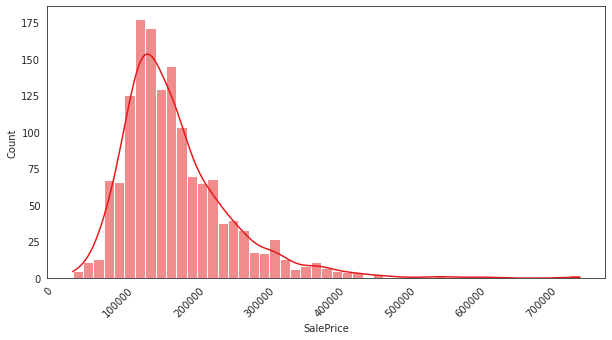

In [15]:
plt.figure(figsize = (10, 5))
sns.histplot(data=train_df, x='SalePrice', kde=True)
plt.xticks(rotation=45)

In [16]:
print('SalePrice Skewness: {}'.format(train_df['SalePrice'].skew()))
print('SalePrice Kurtosis: {}'.format(train_df['SalePrice'].kurt()))

SalePrice Skewness: 1.8828757597682129
SalePrice Kurtosis: 6.536281860064529


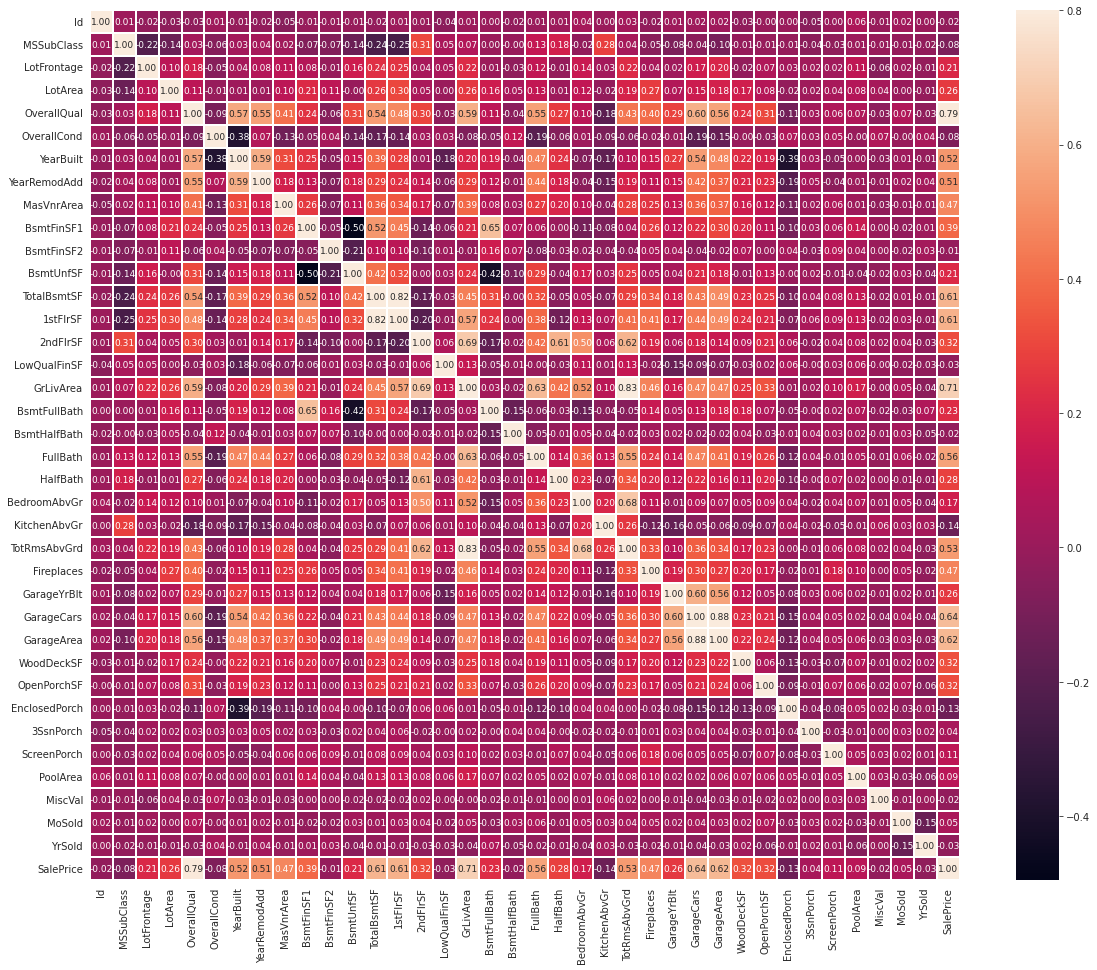

In [17]:
corrmat = train_df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corrmat, square=True, linewidths=0.1, linecolor='white', vmax=0.8, annot=True, annot_kws={'size':9}, fmt='.2f');

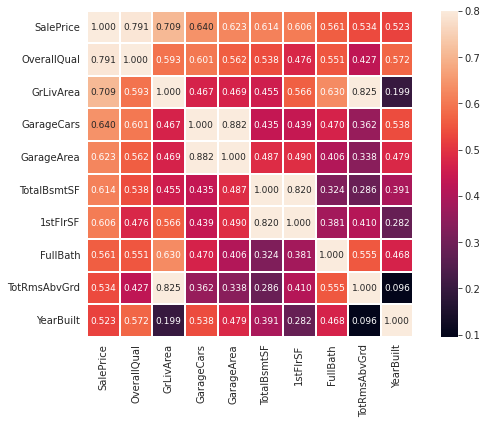

In [18]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index

plt.figure(figsize=(10, 6))
sns.heatmap(train_df[cols].corr(), square=True, linewidths=0.1, linecolor='white', vmax=0.8, annot=True, annot_kws={'size':9}, fmt='.3f');

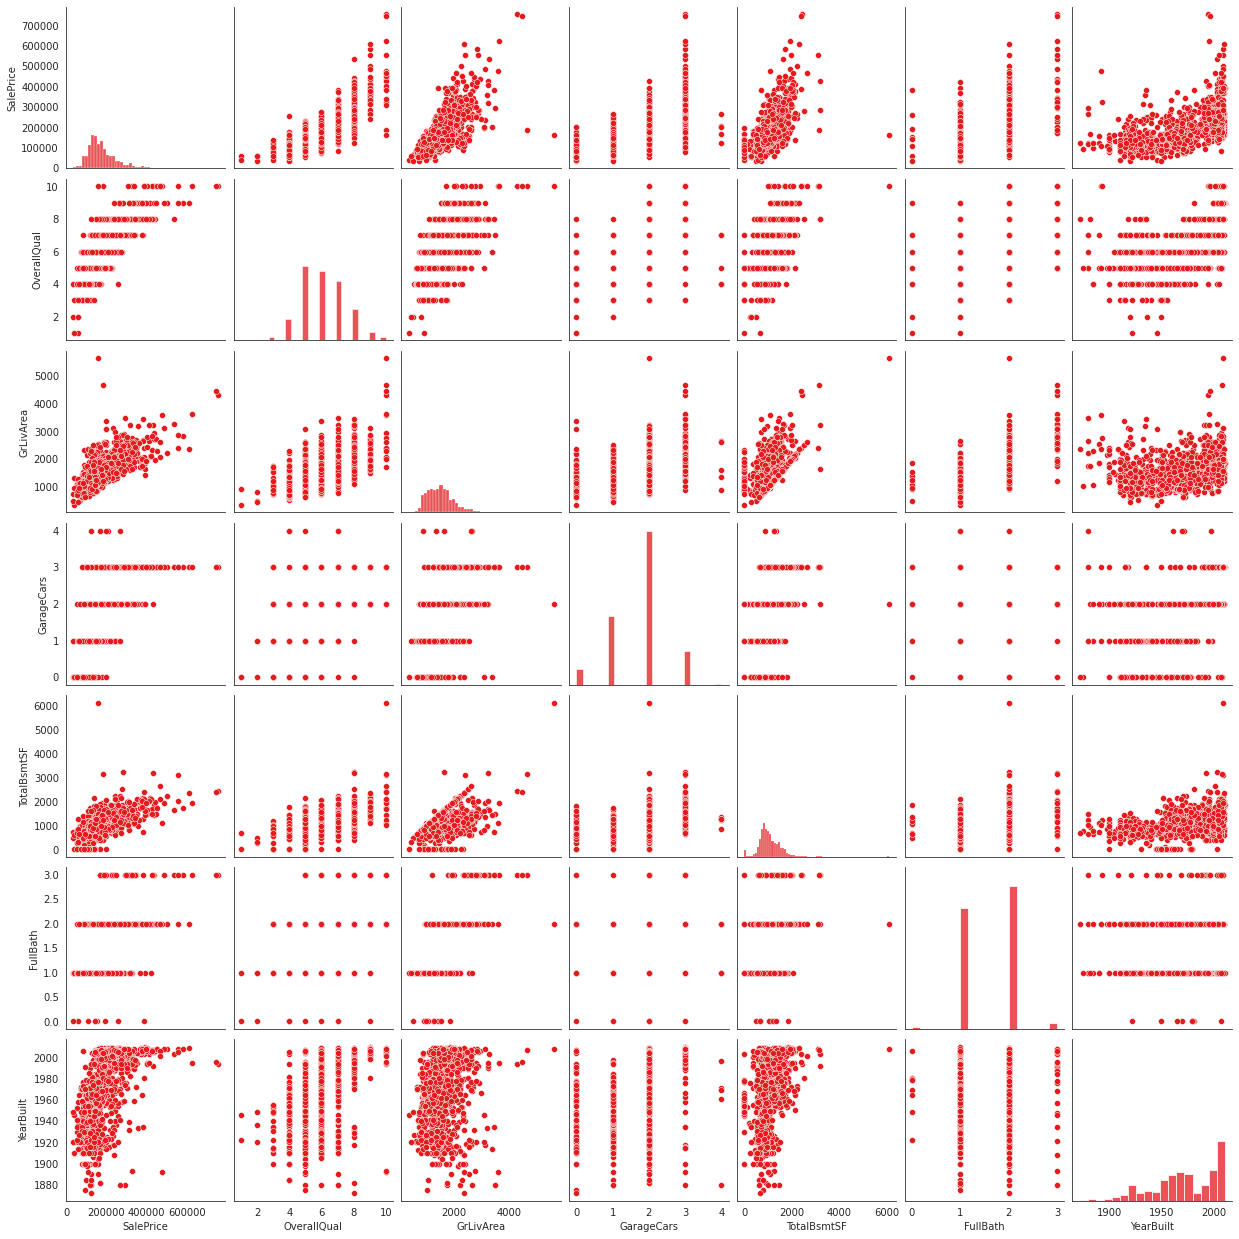

In [19]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols]);

In [20]:
def plot_num(data, x, y):
    plt.figure(figsize=(15, 8))
    sns.regplot(data=data, x=x, y=y, marker='*', robust=True)
    plt.xticks(rotation=45)
    plt.show()

def plot_cat(data, x, y):
    plt.figure(figsize=(20, 8))
    sns.boxplot(data=data, x=x, y=y)
    plt.xticks(rotation=90)
    plt.show()

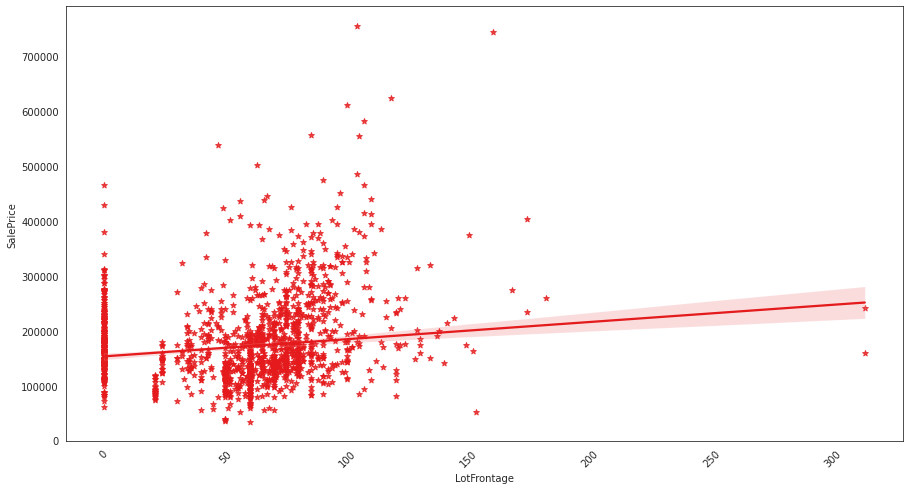

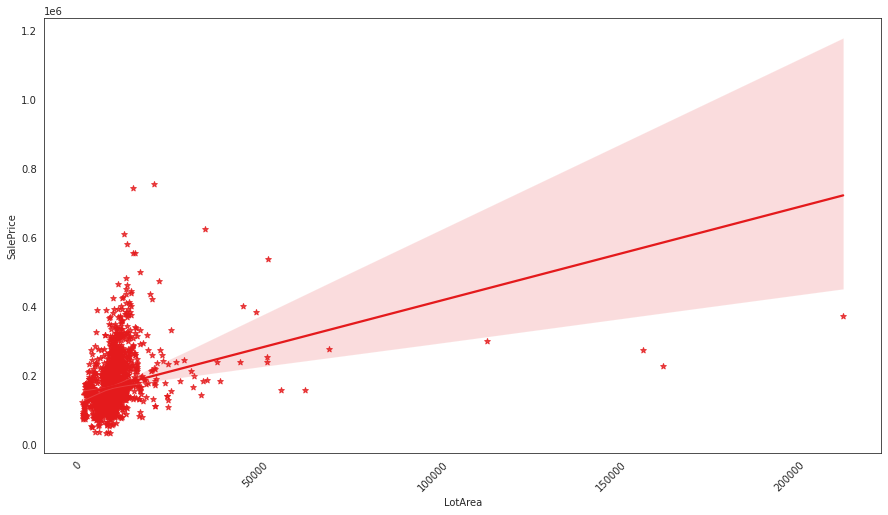

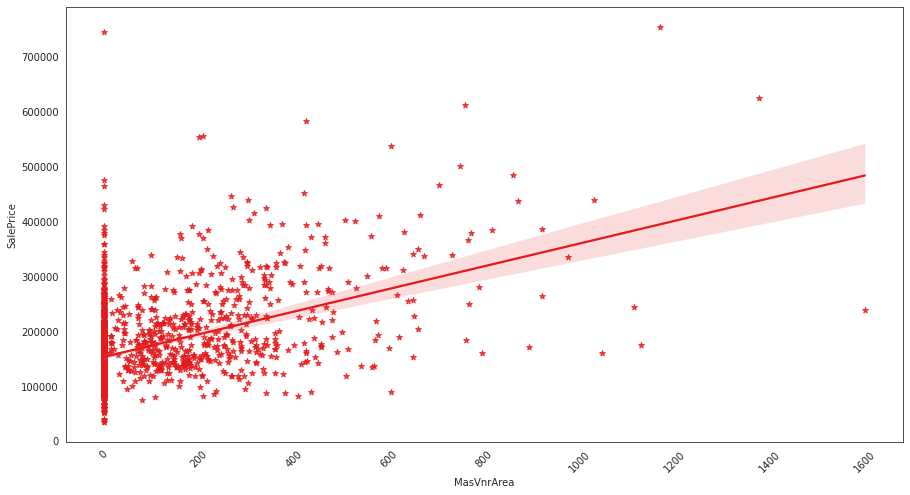

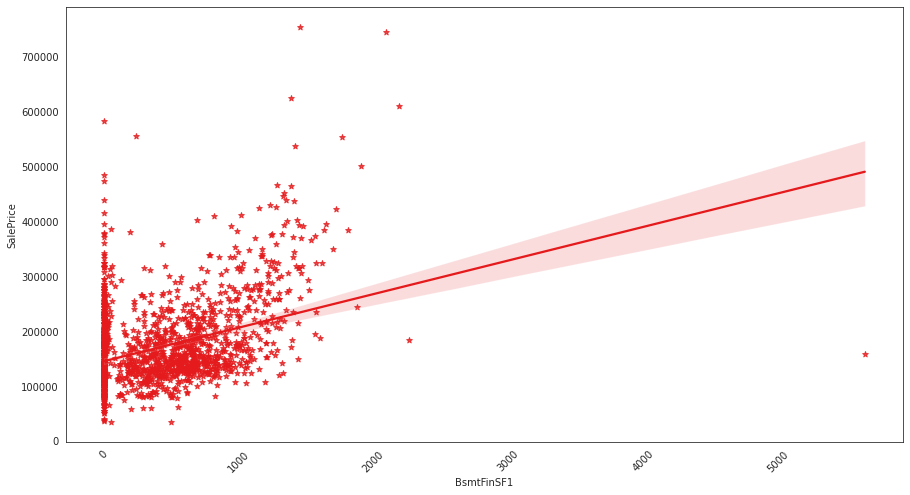

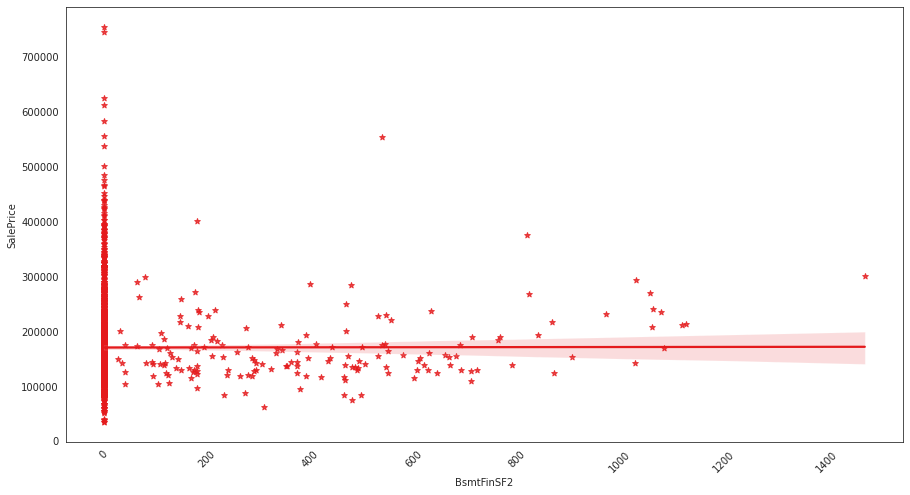

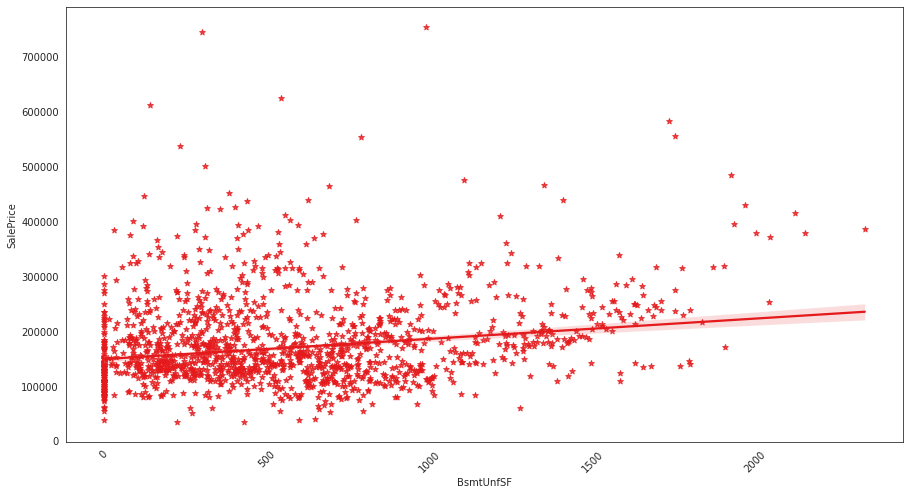

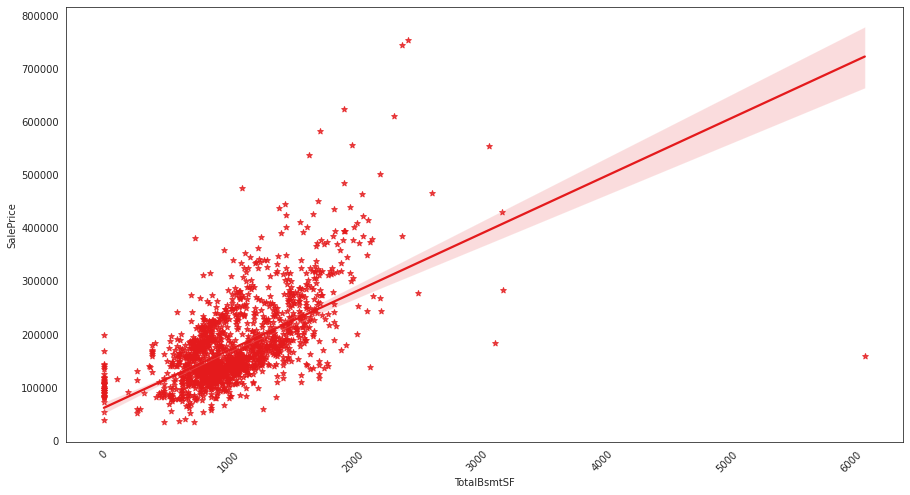

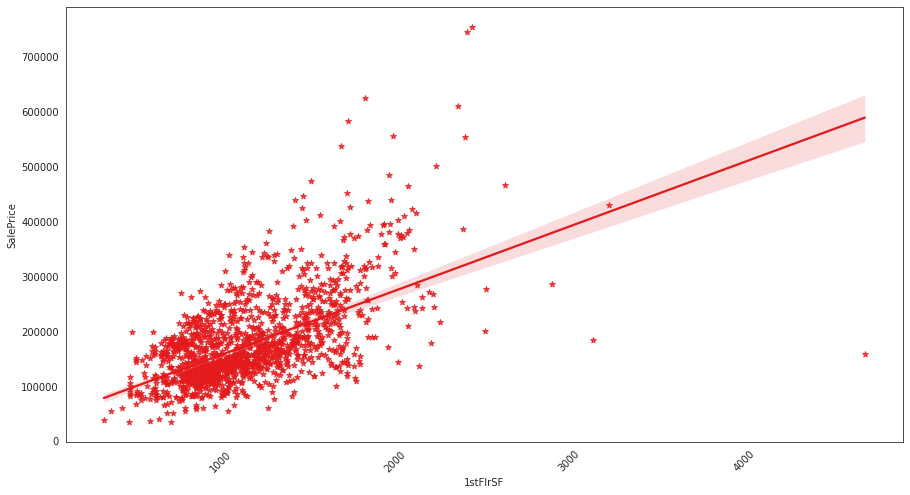

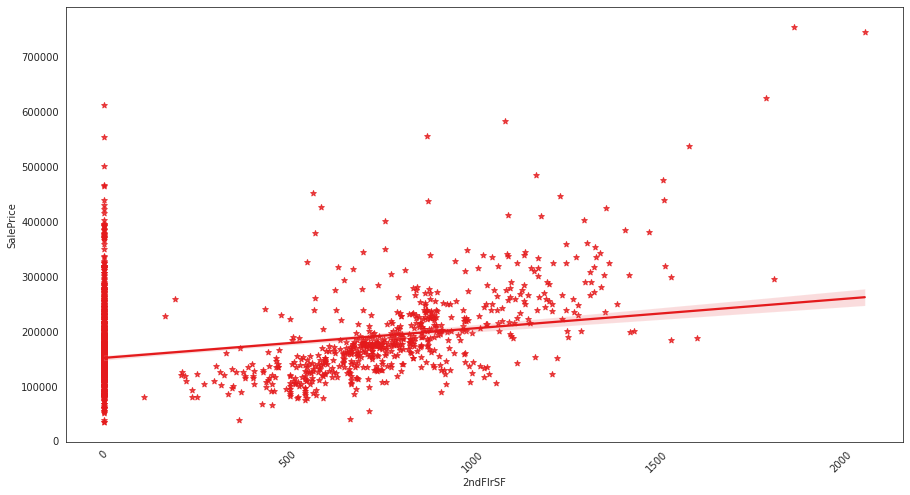

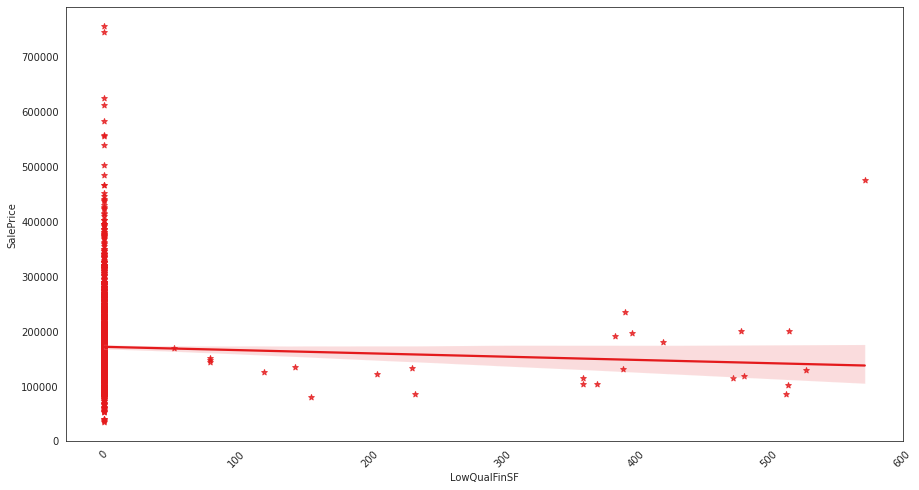

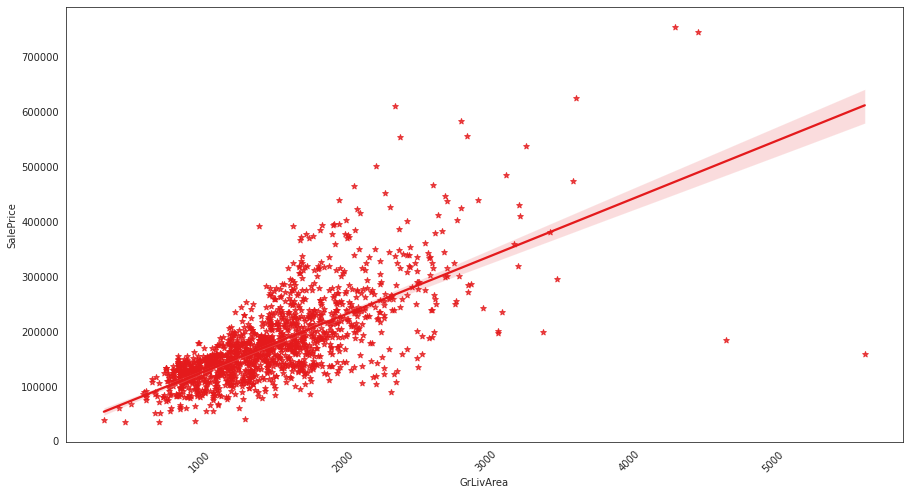

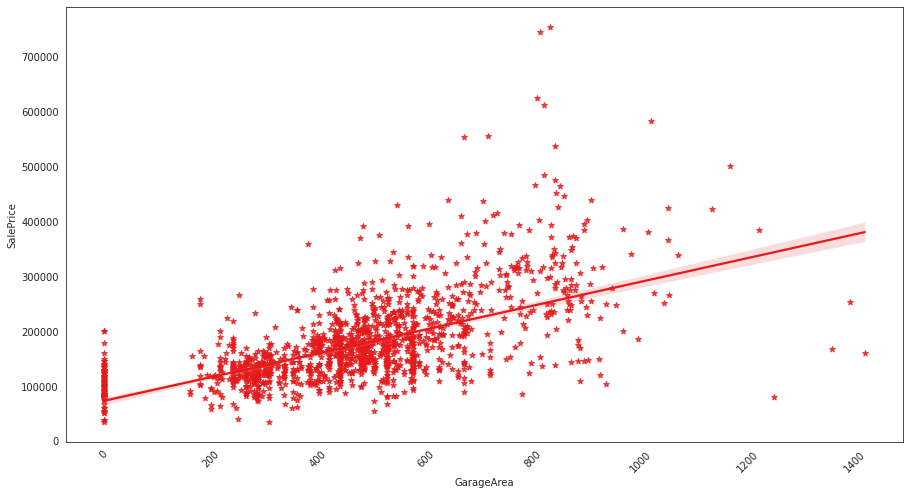

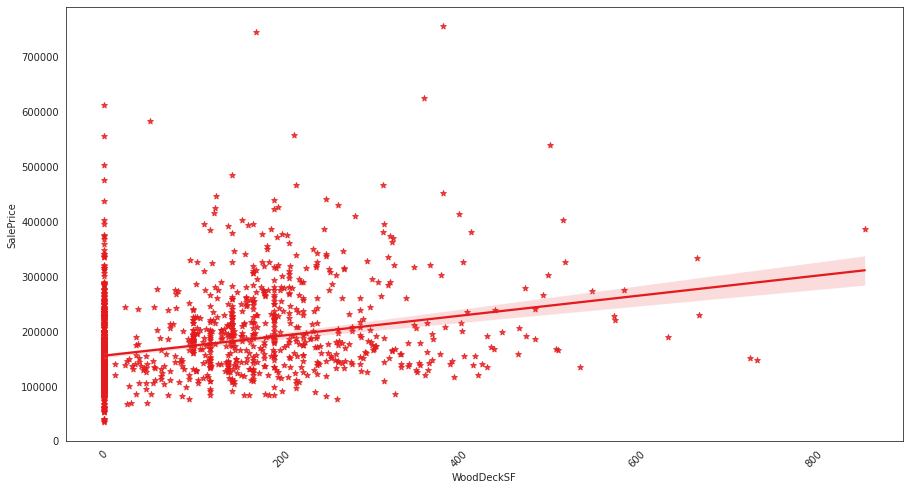

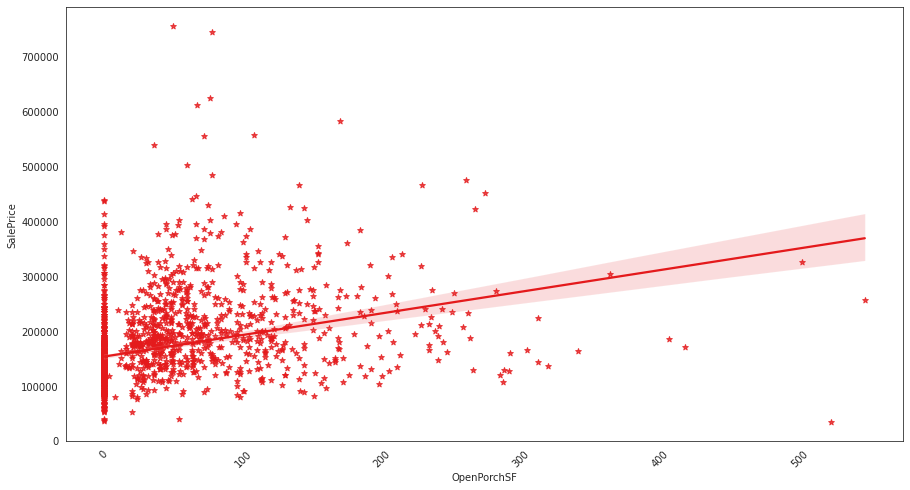

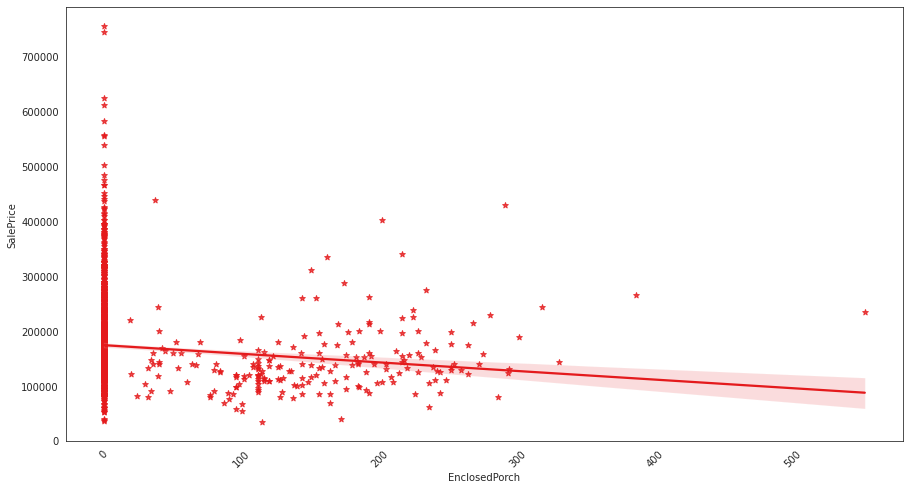

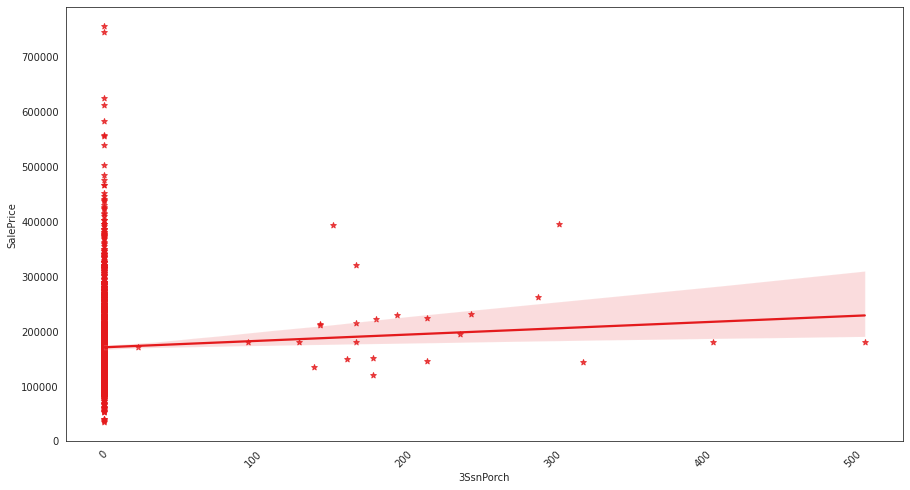

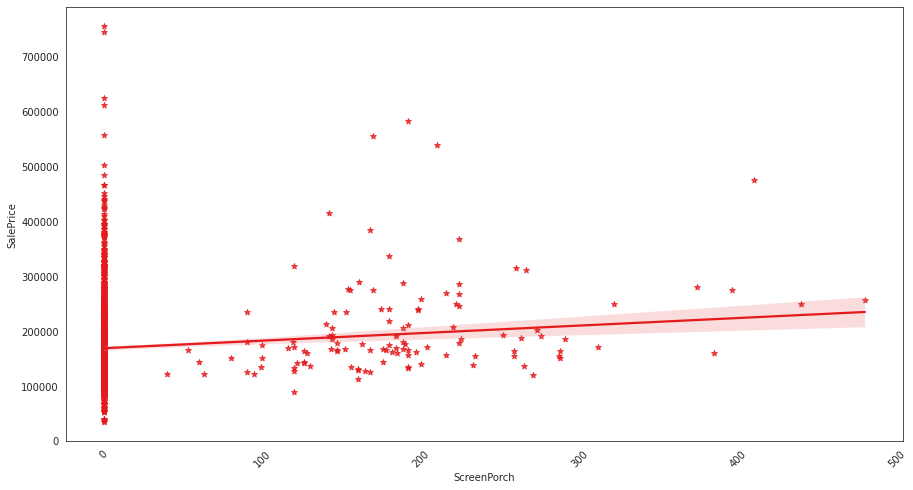

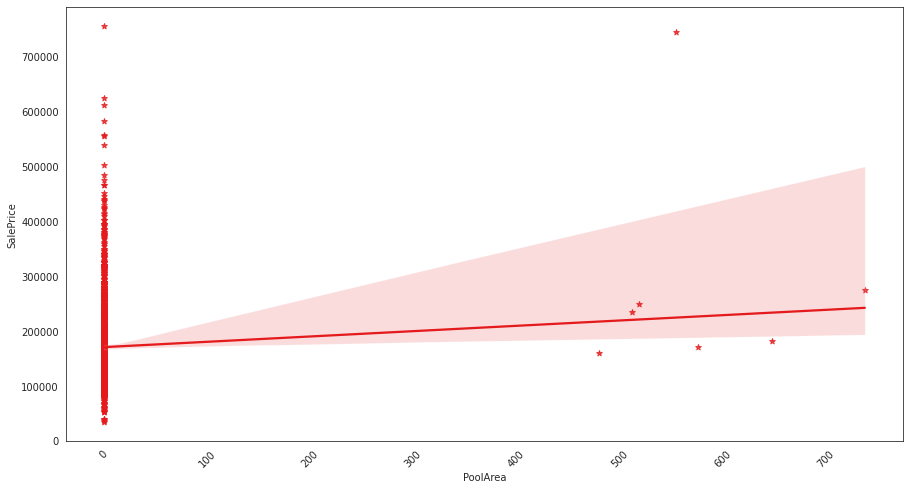

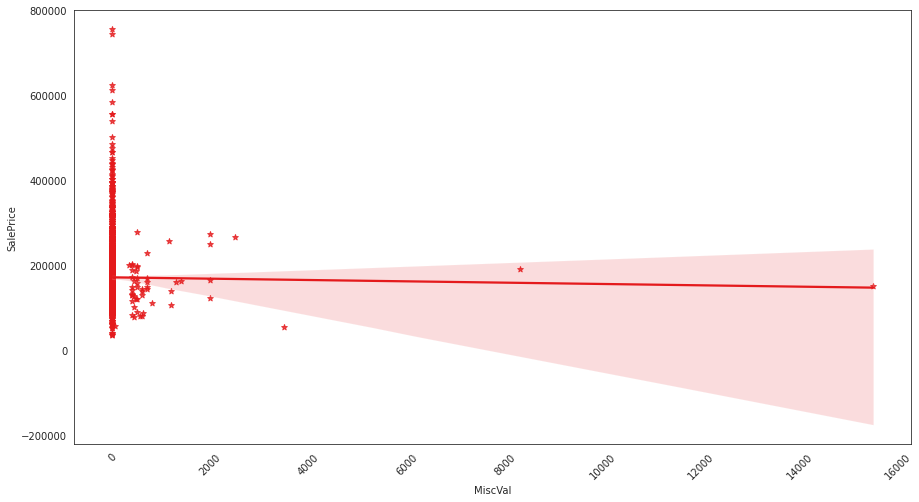

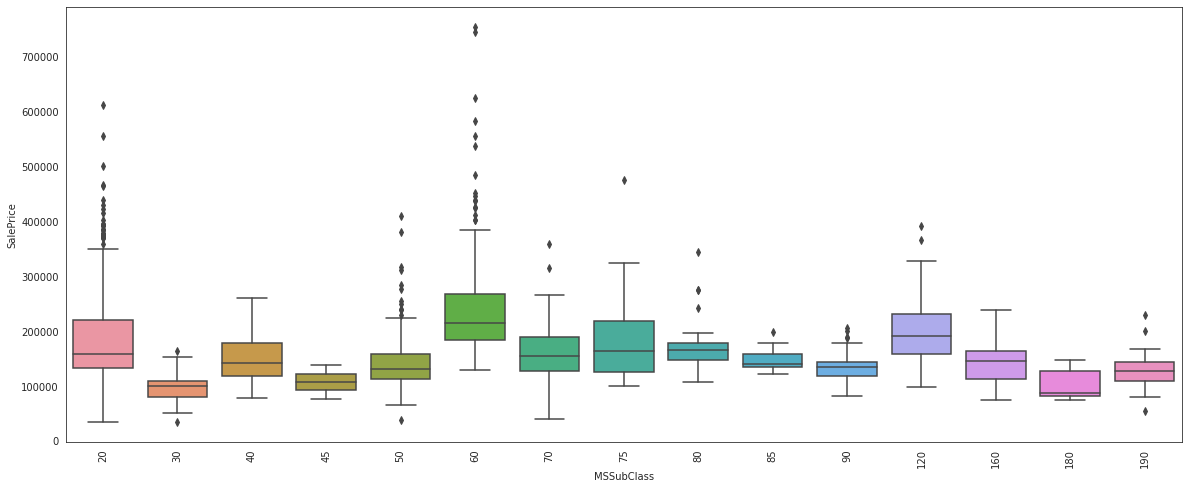

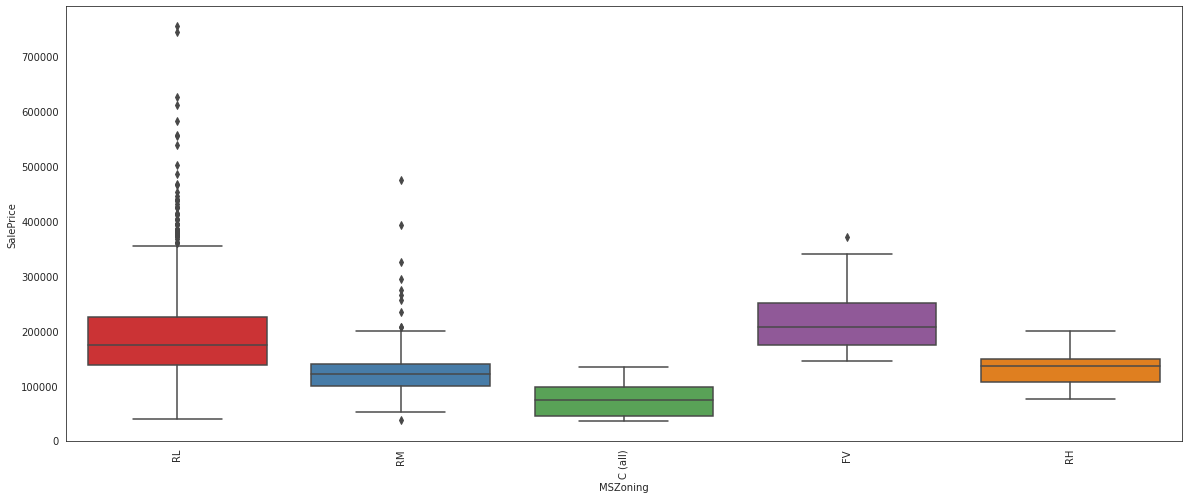

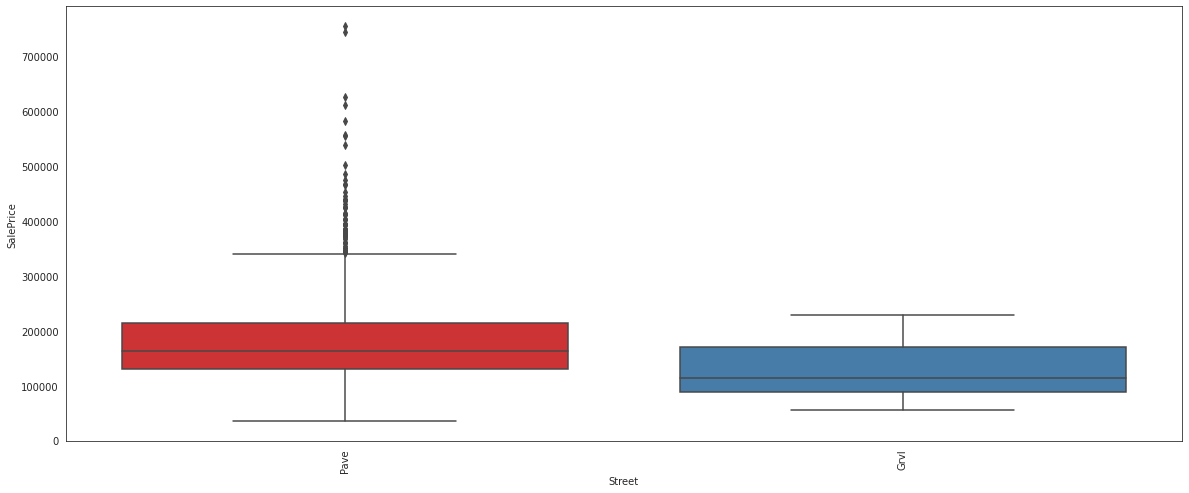

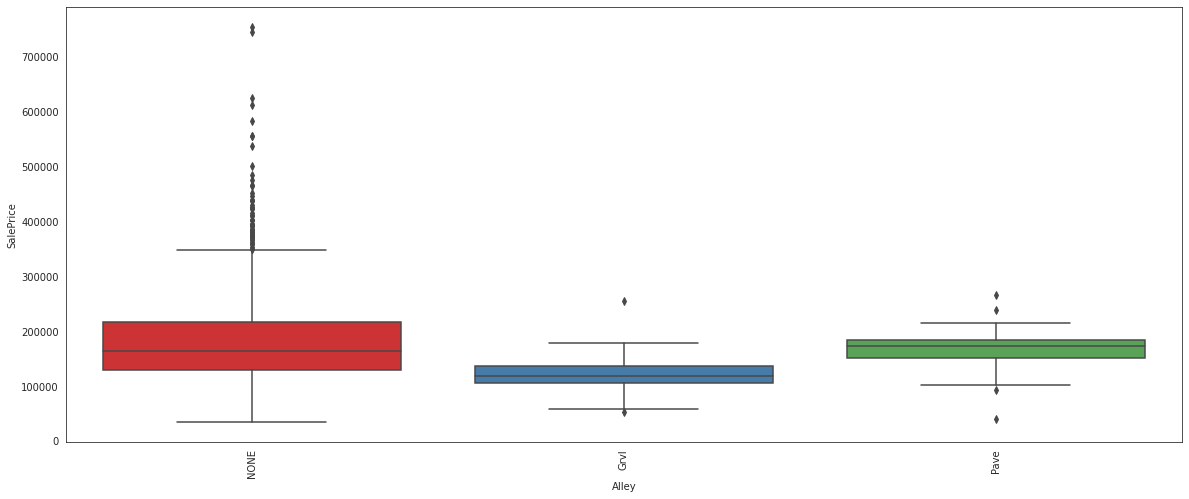

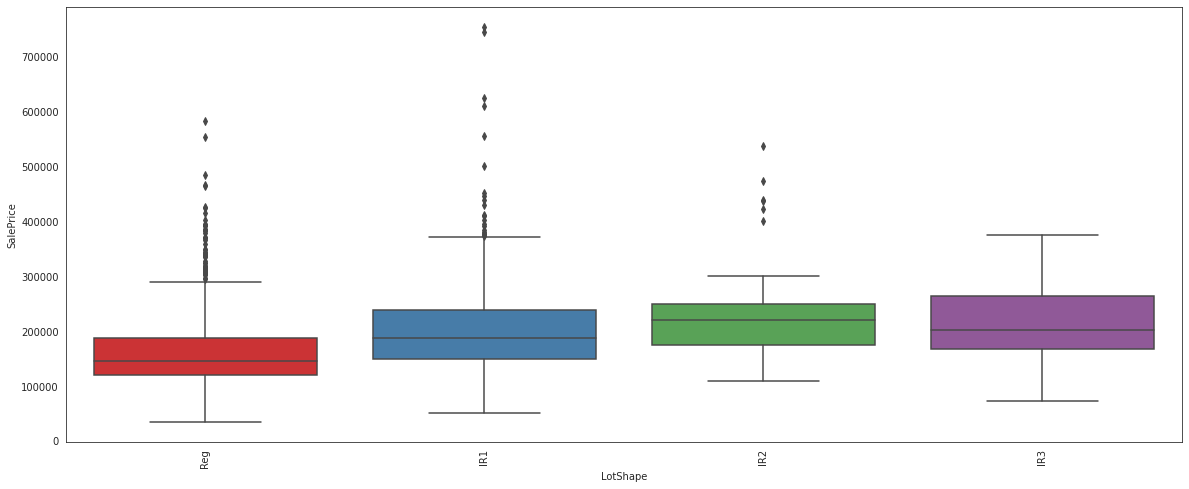

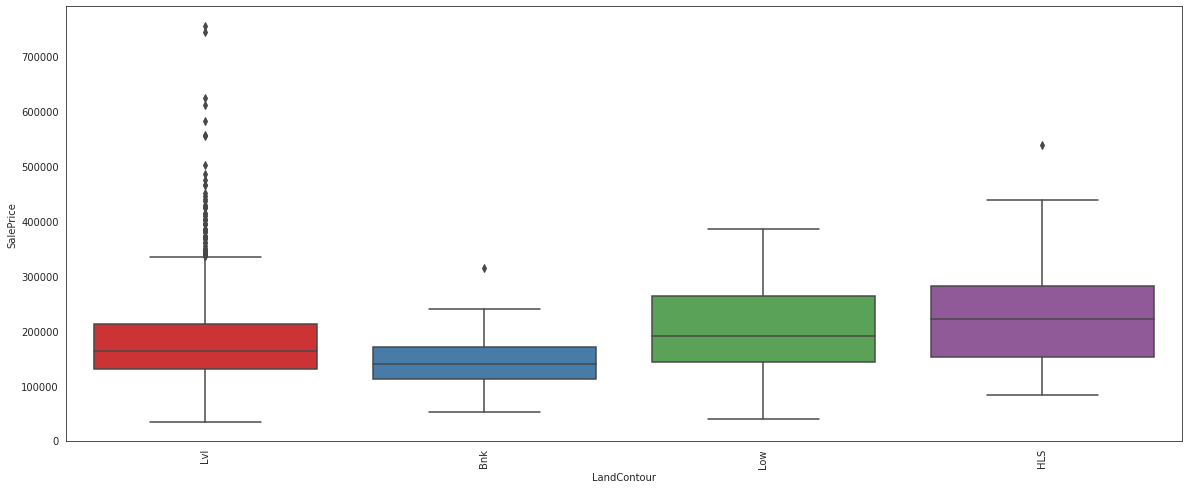

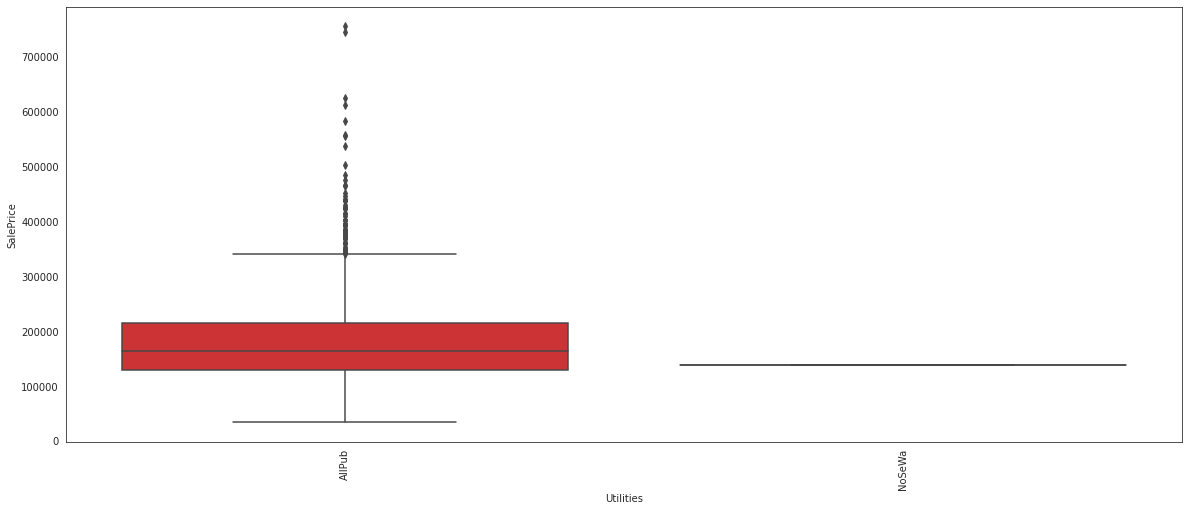

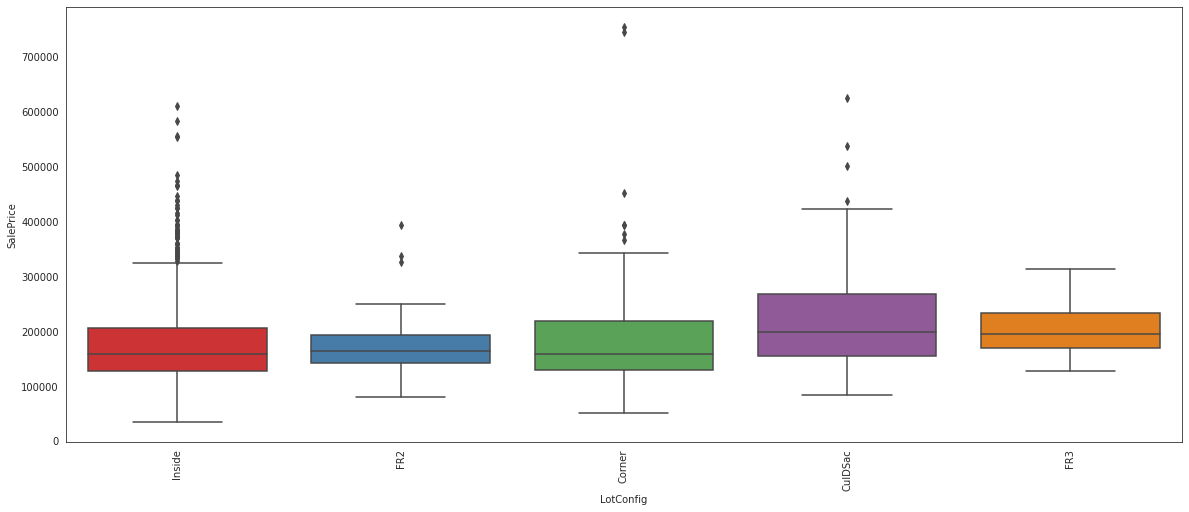

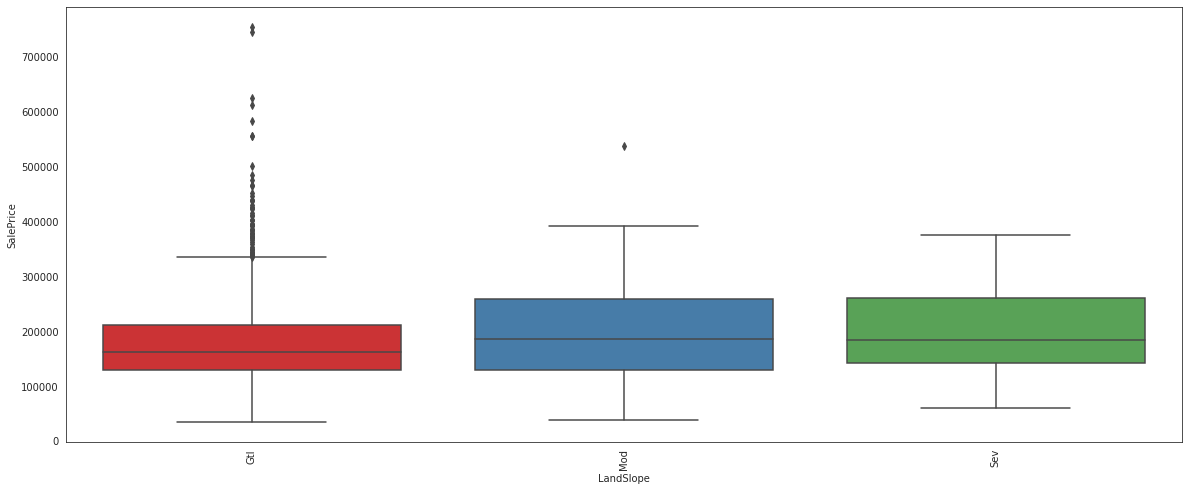

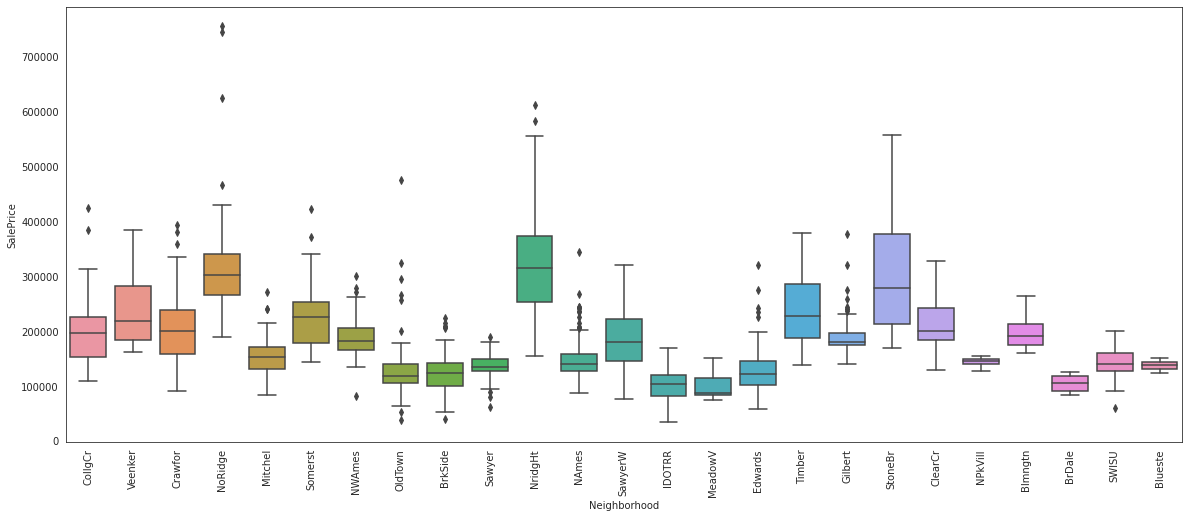

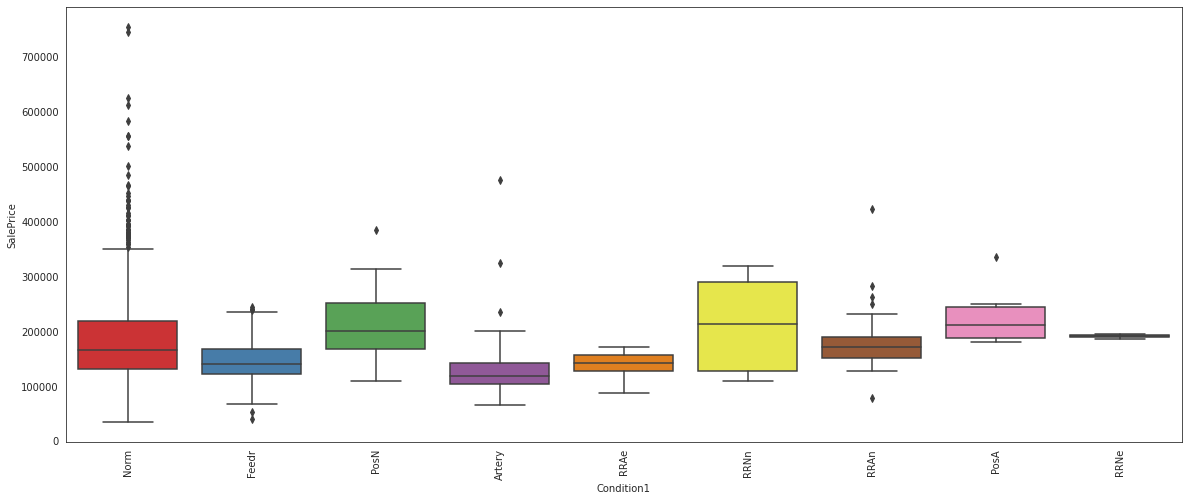

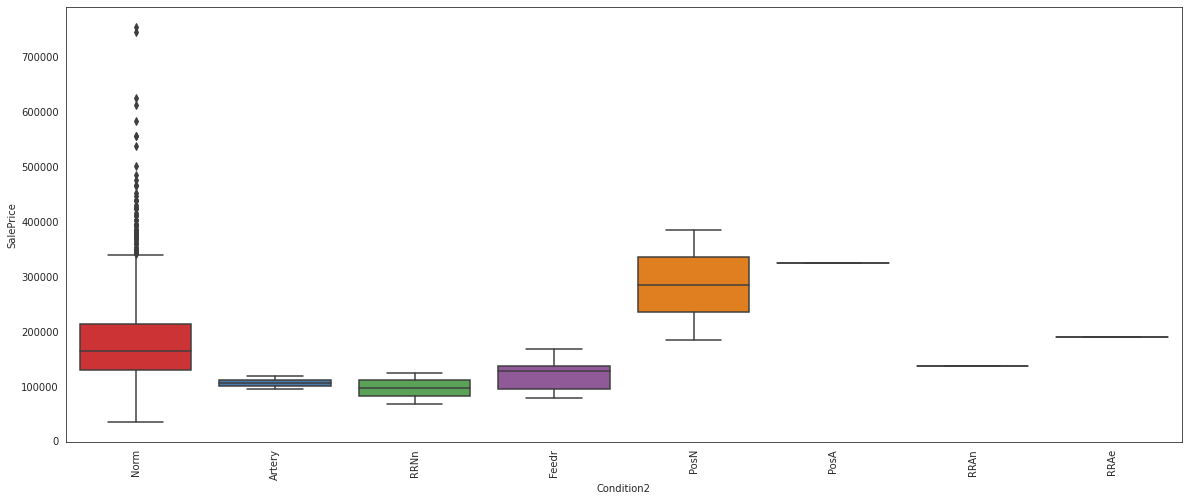

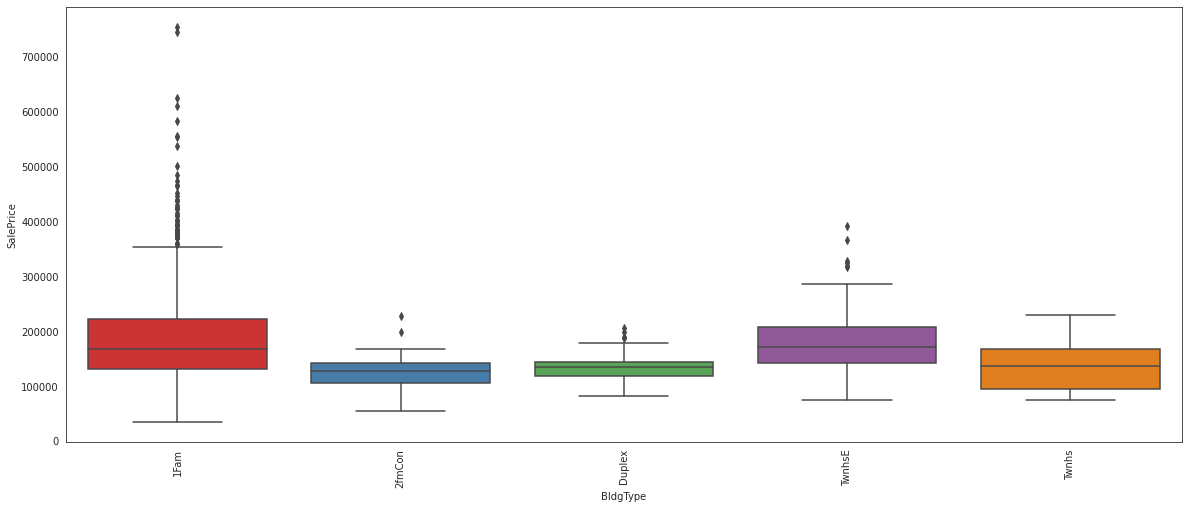

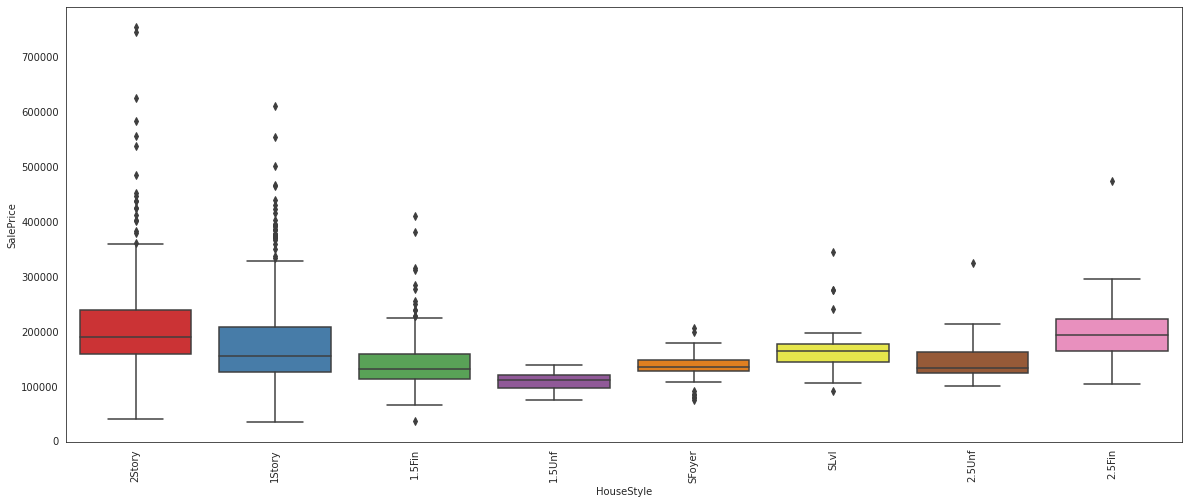

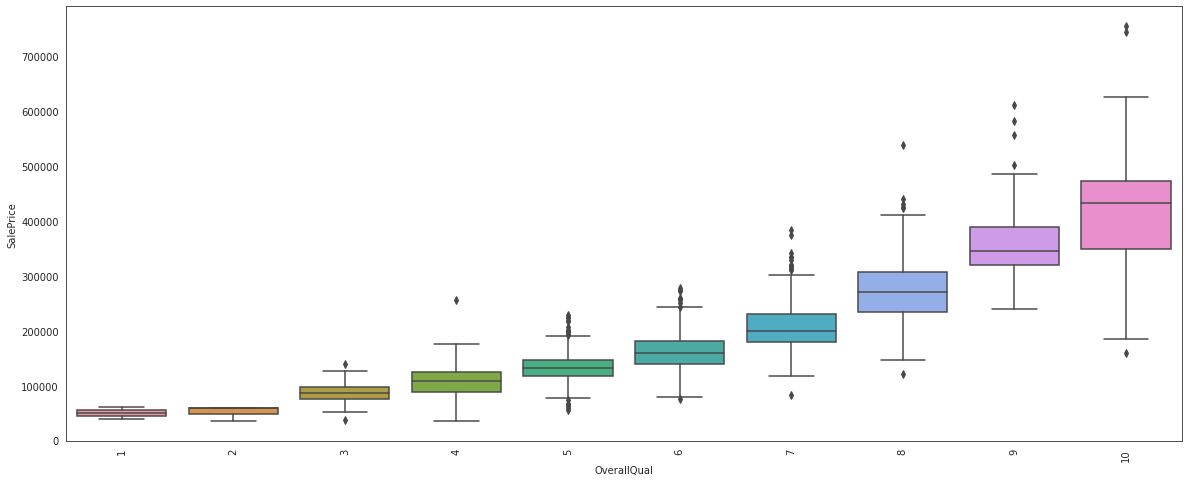

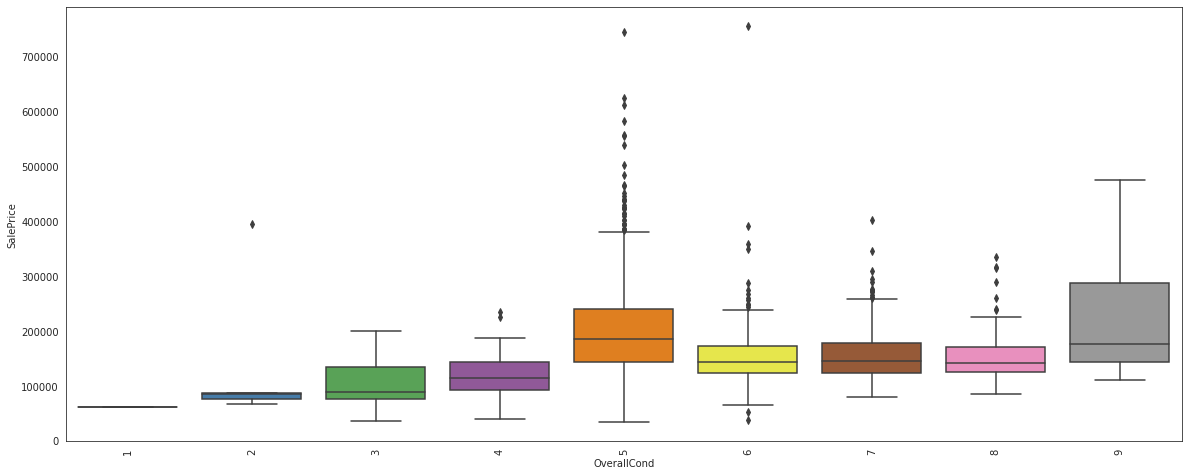

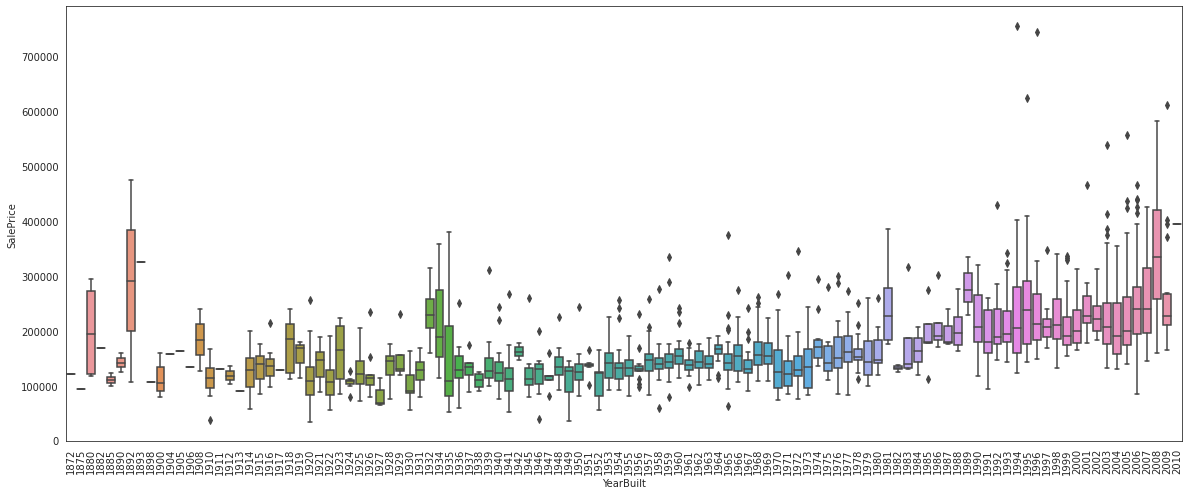

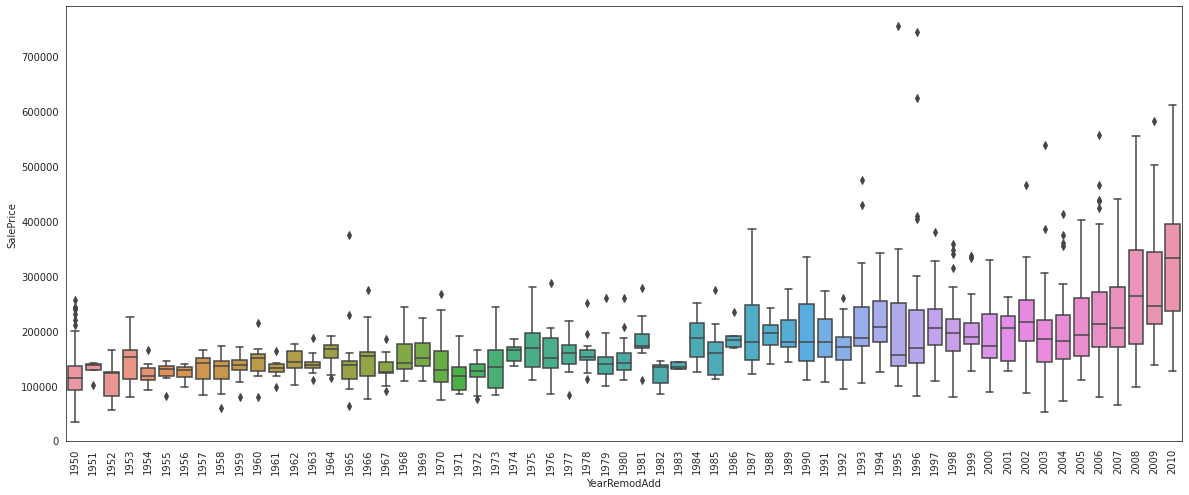

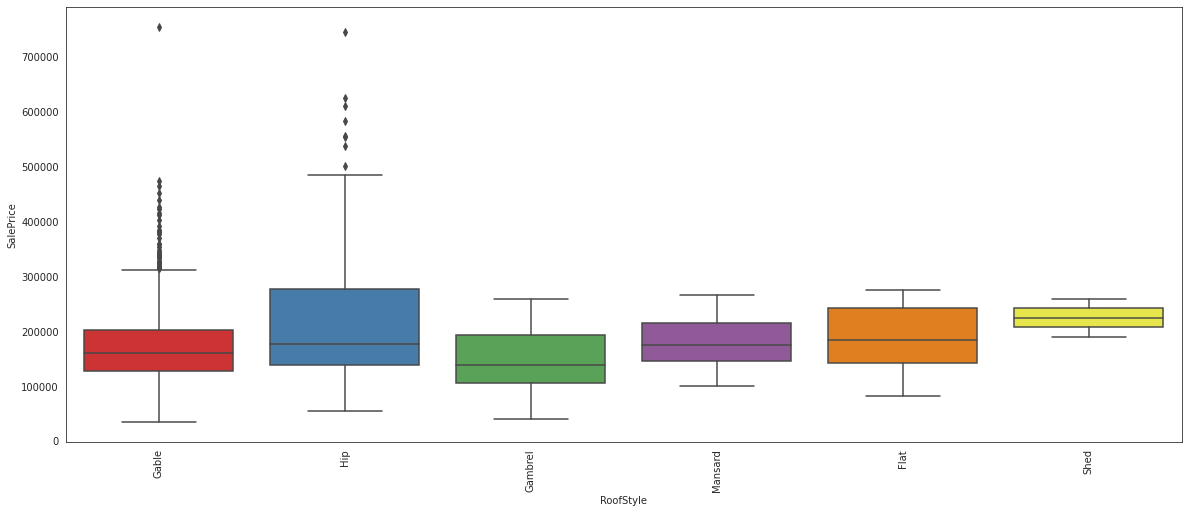

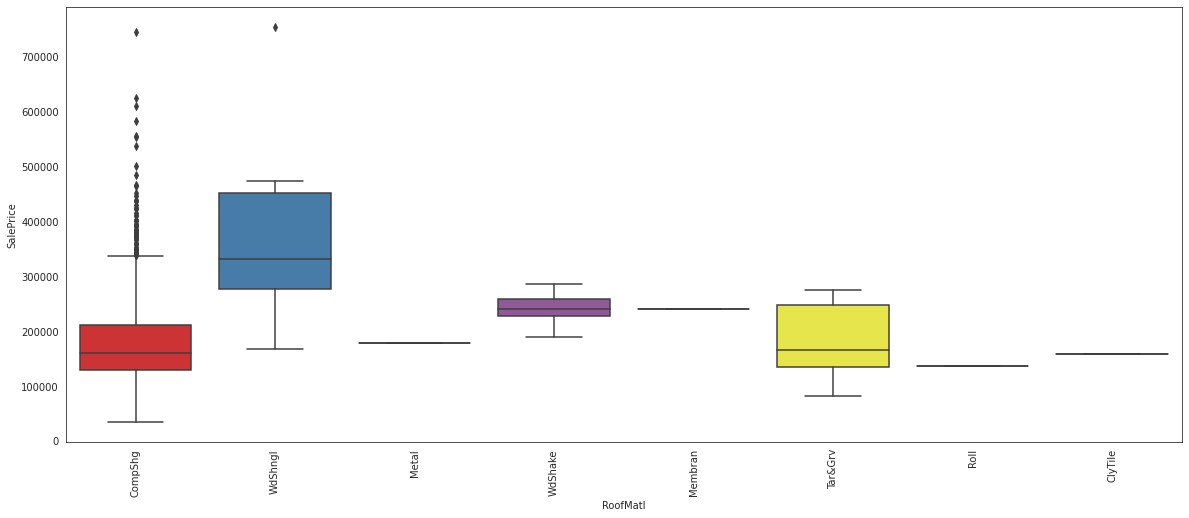

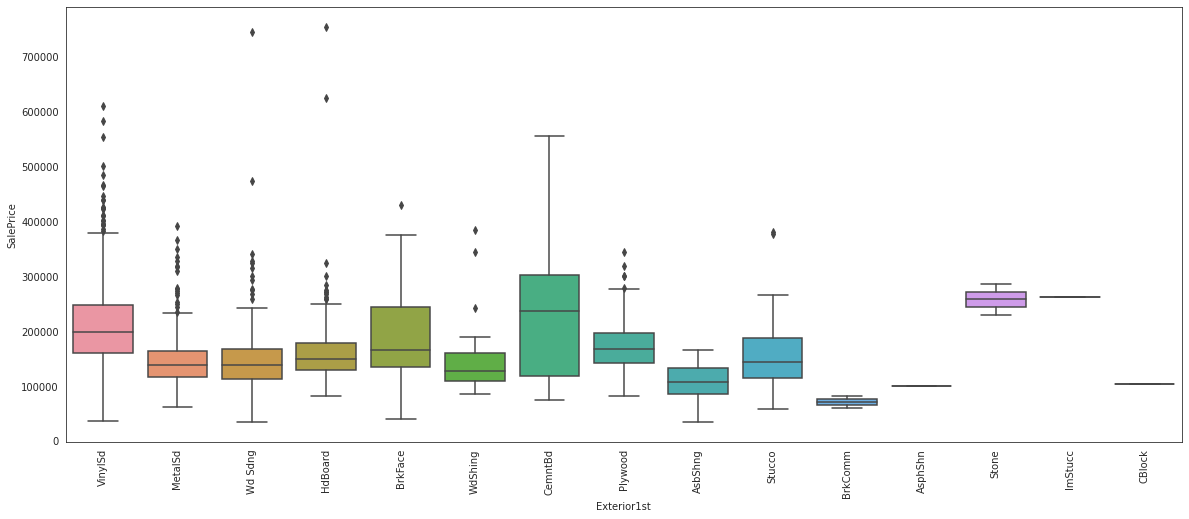

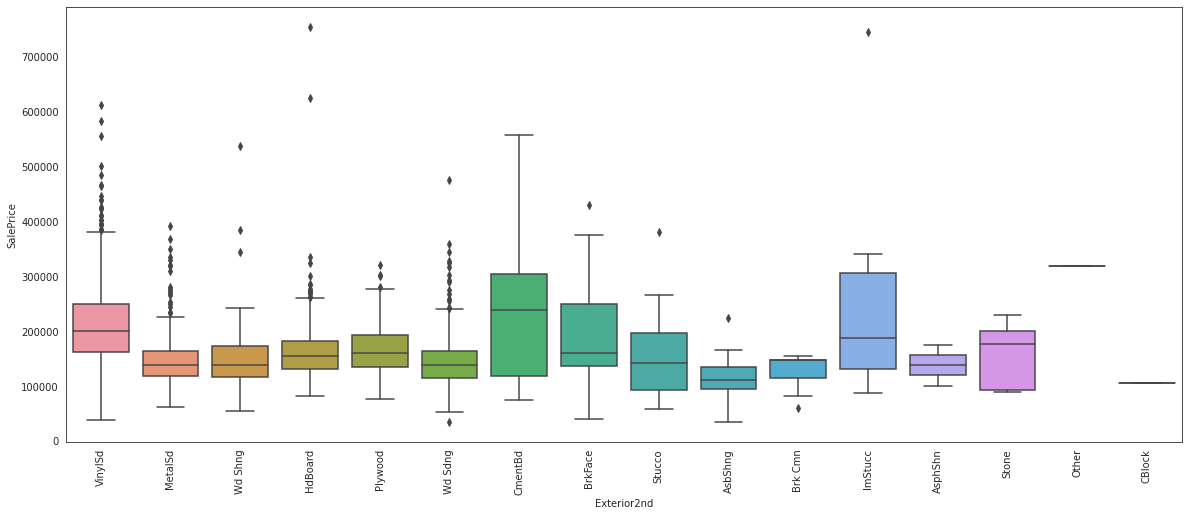

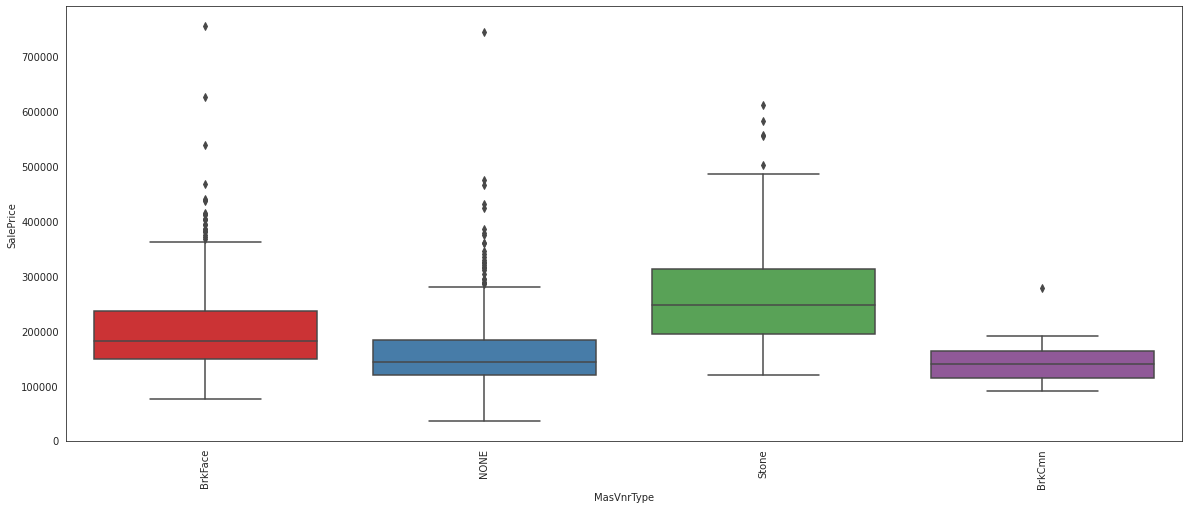

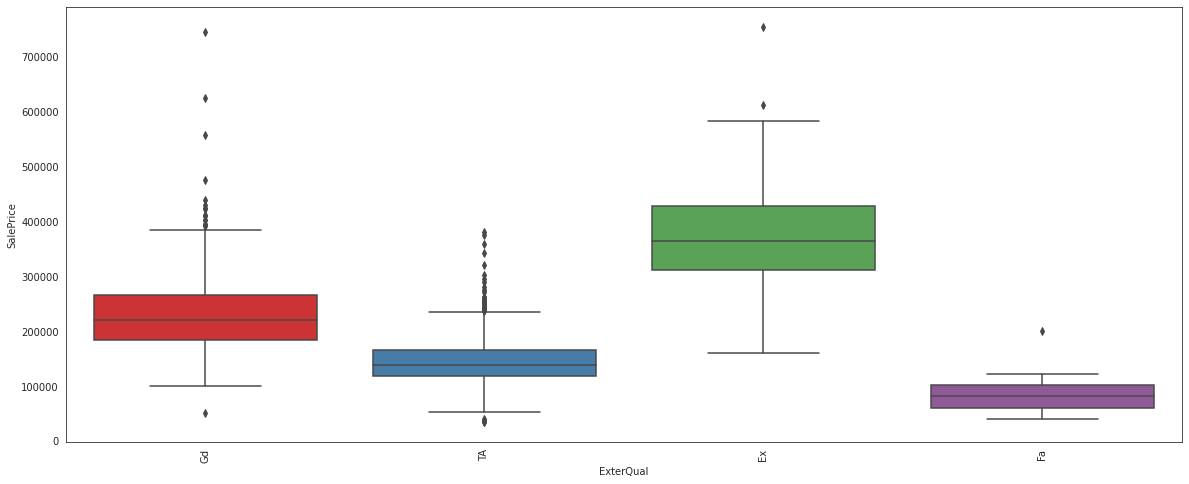

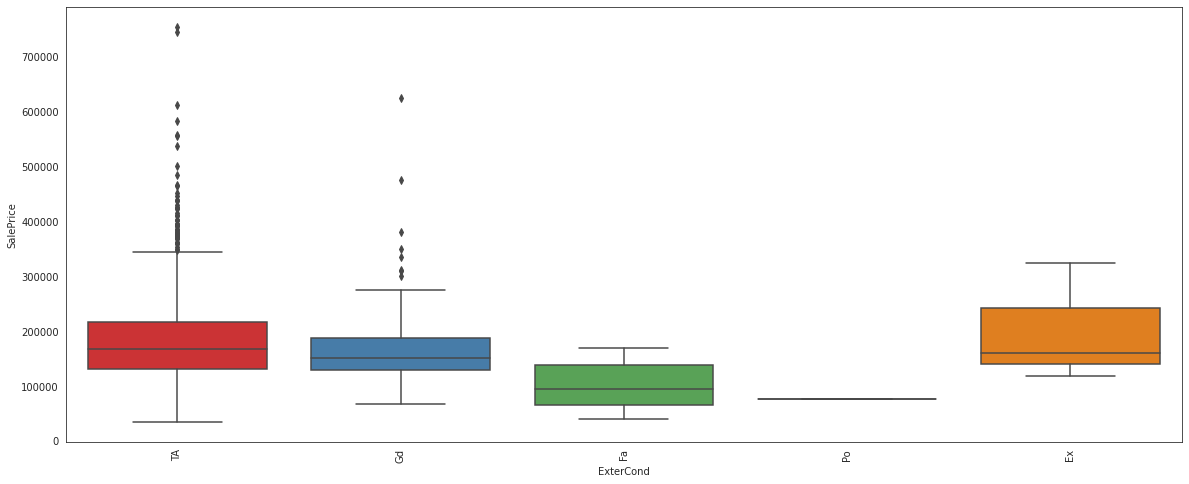

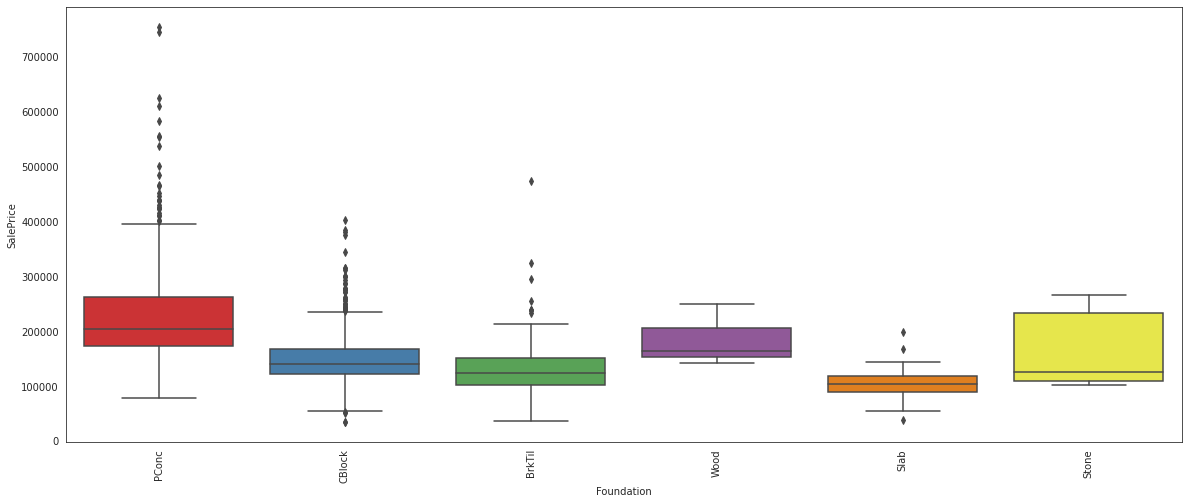

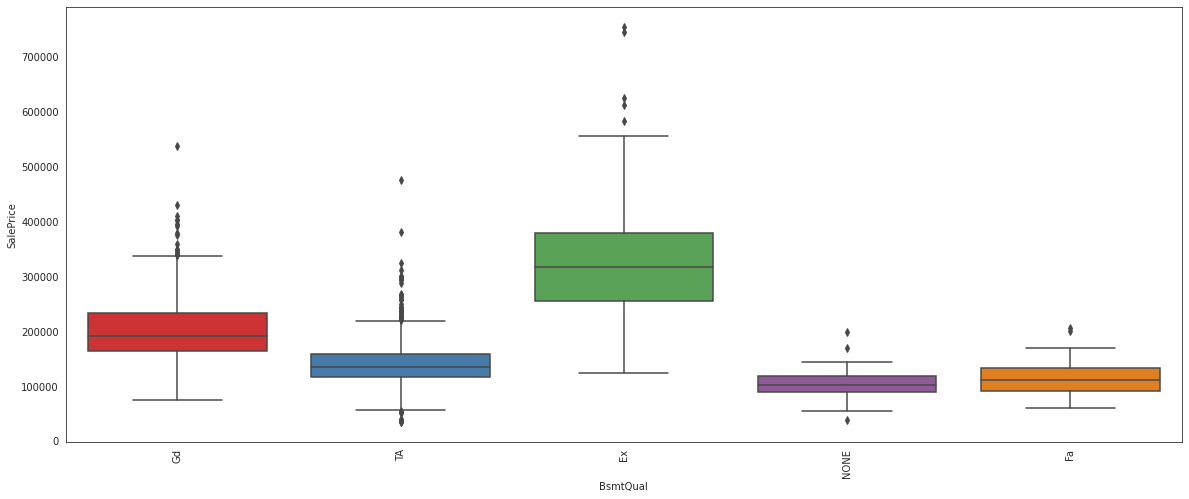

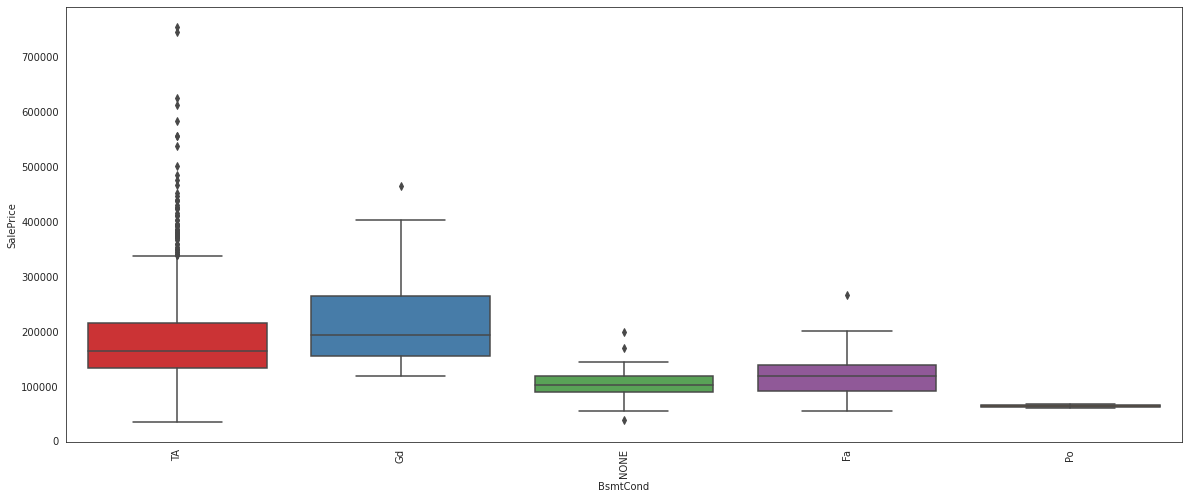

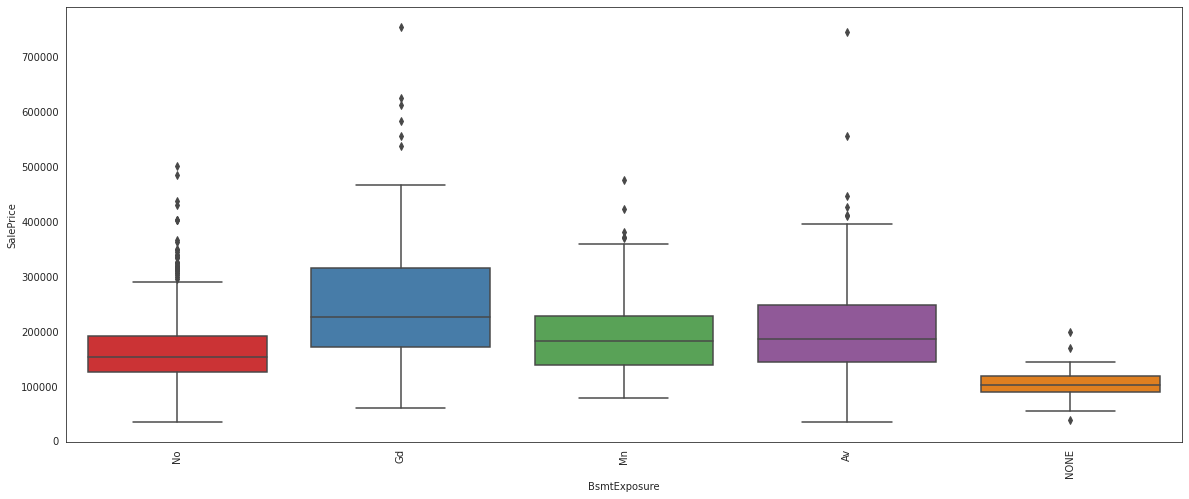

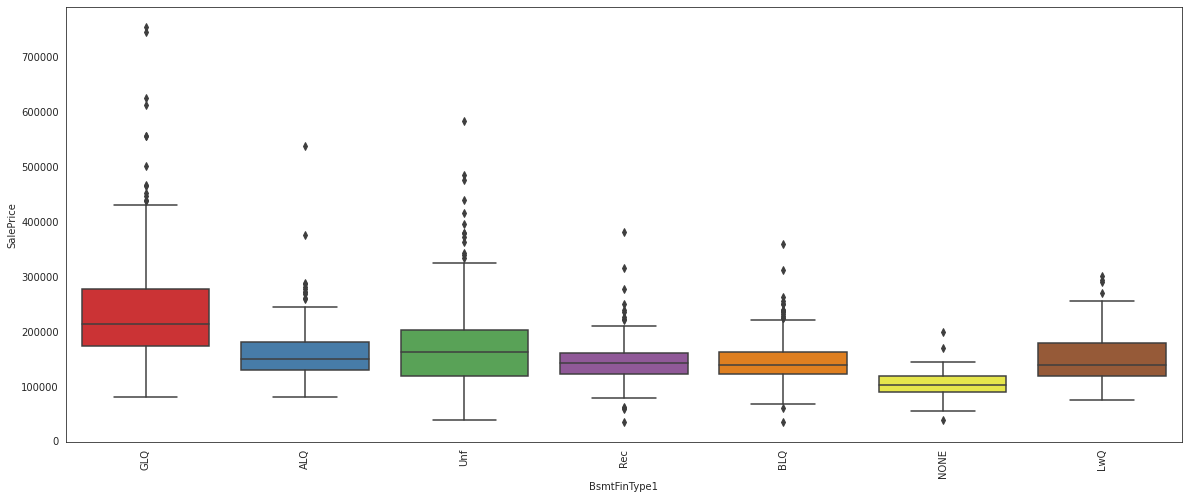

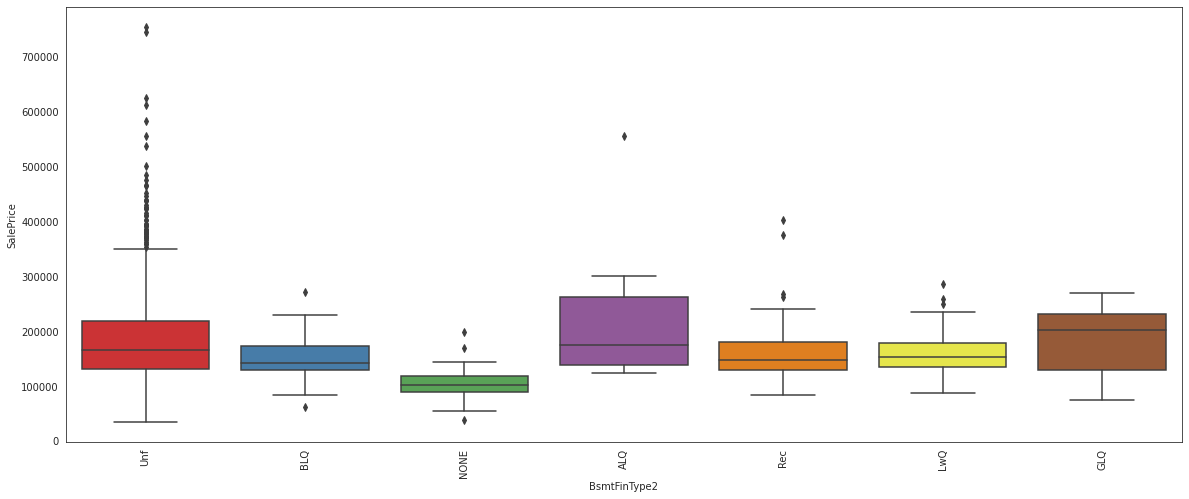

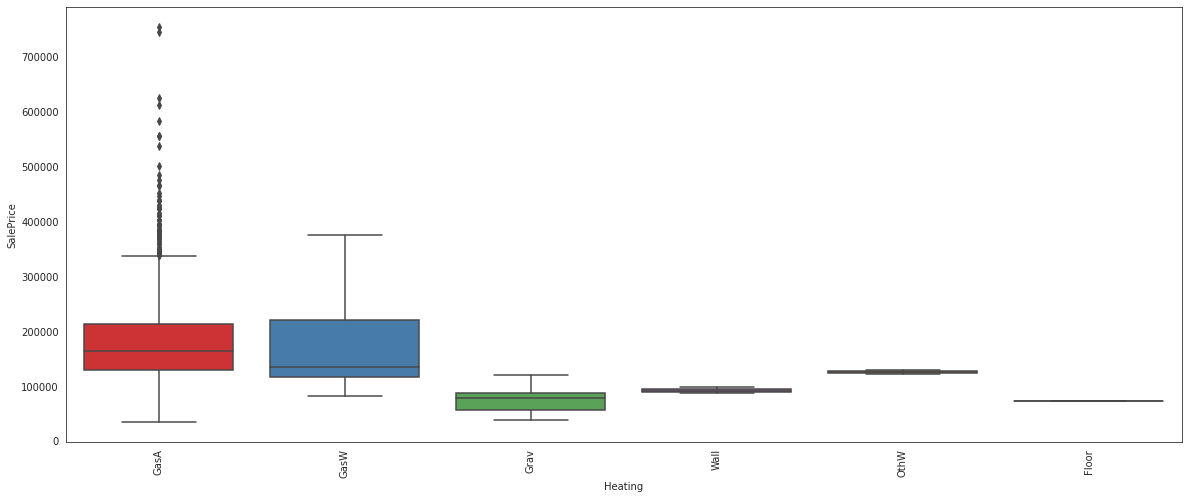

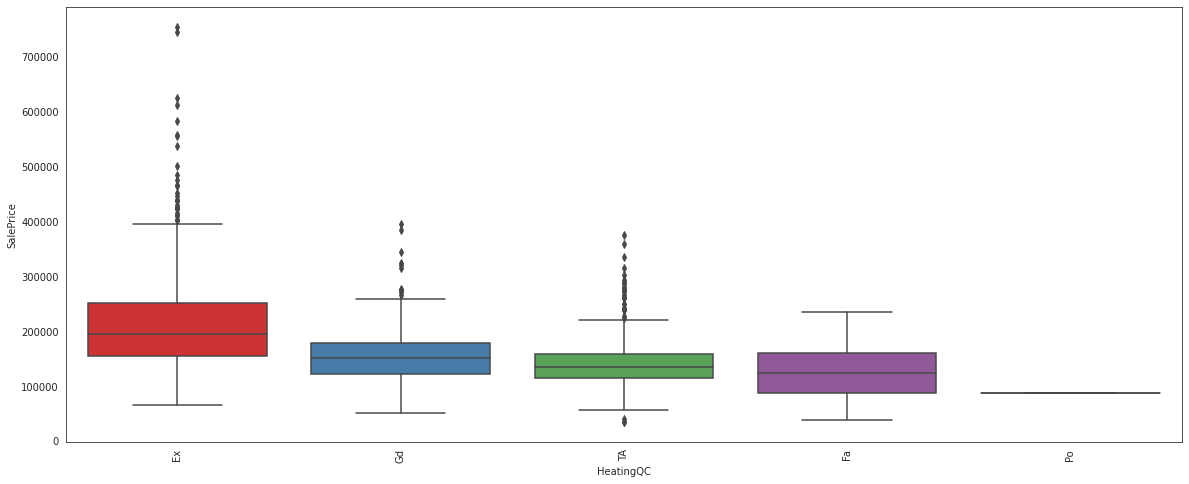

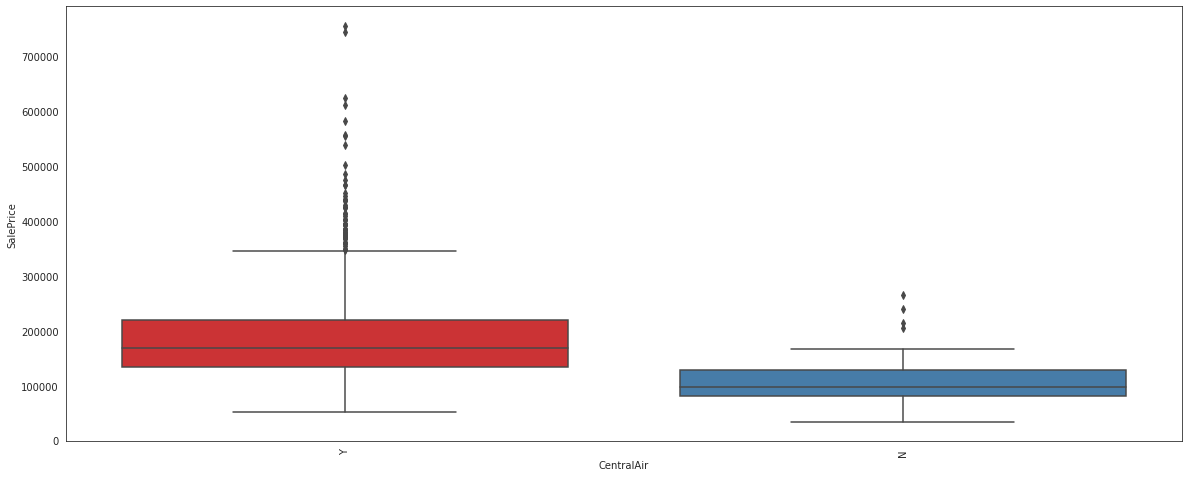

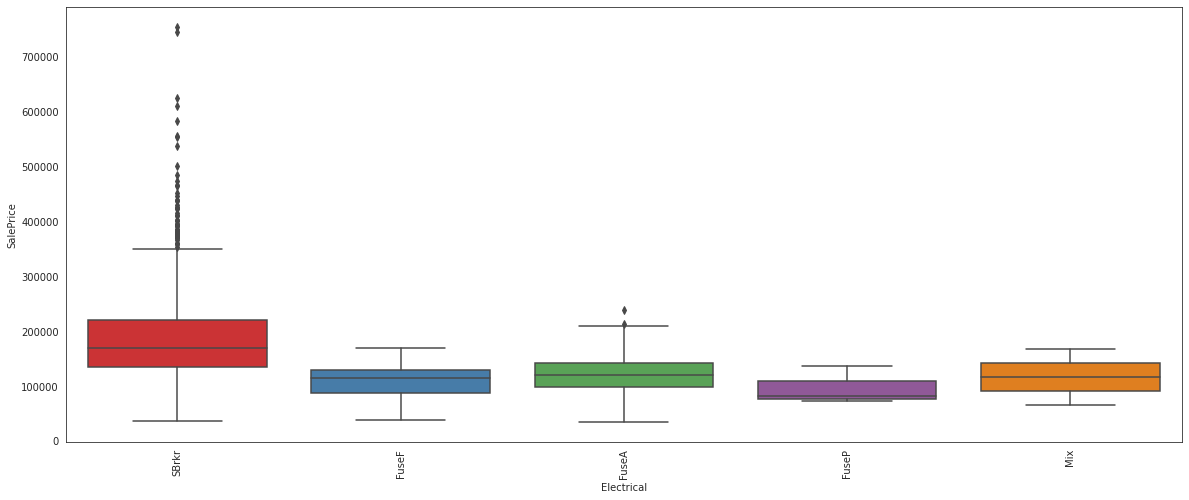

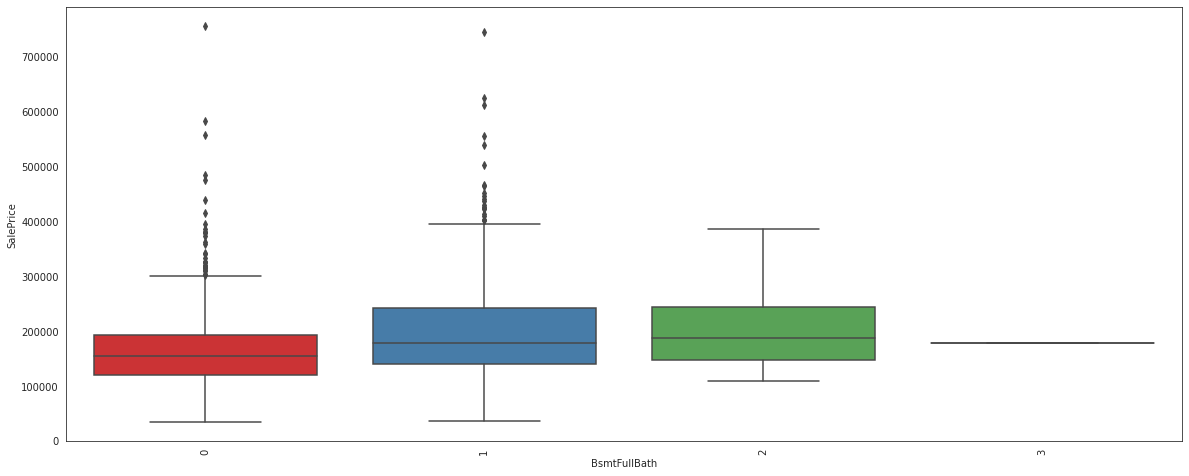

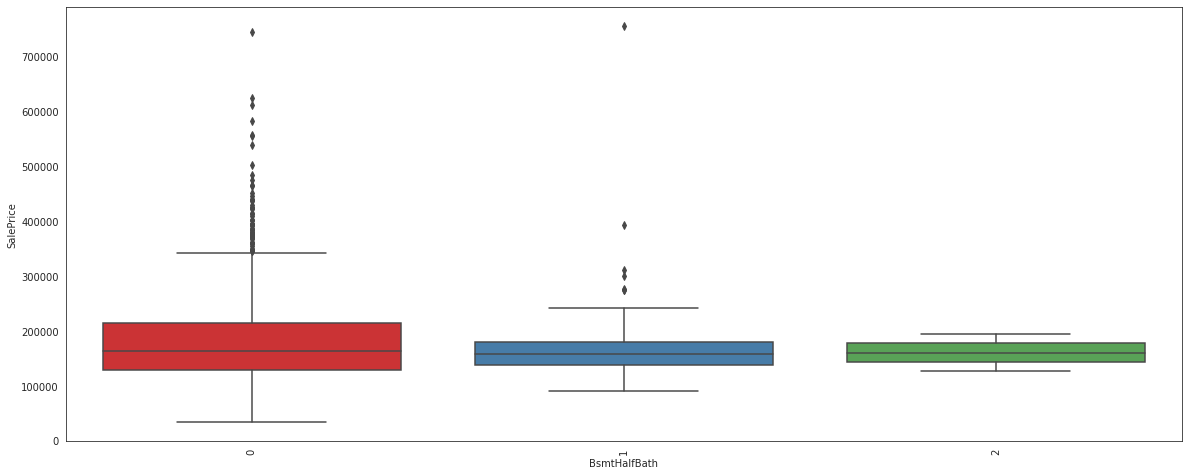

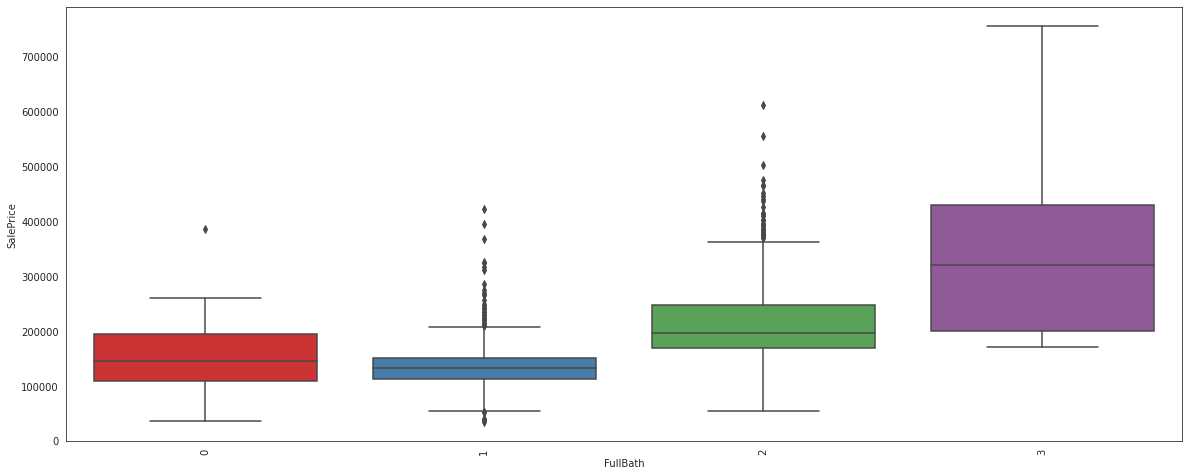

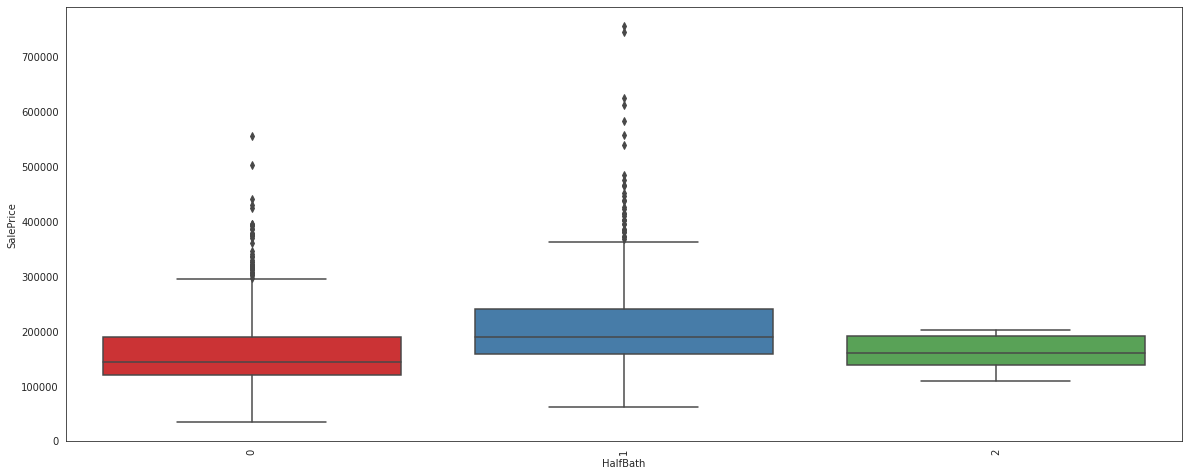

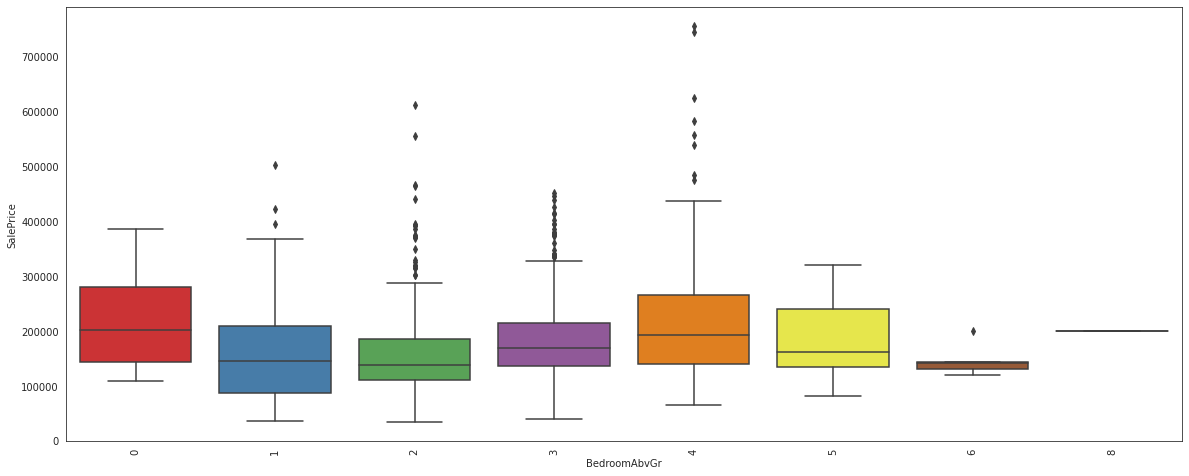

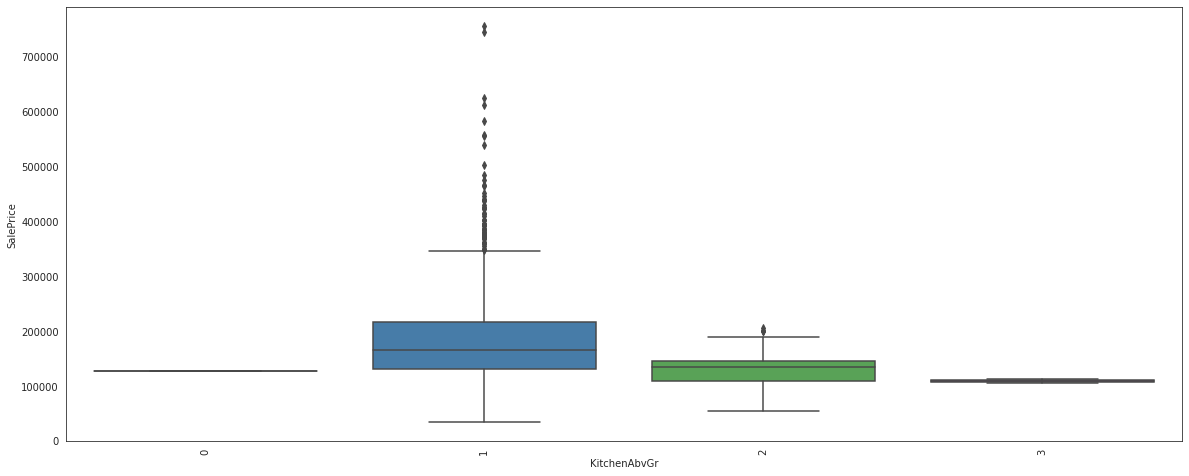

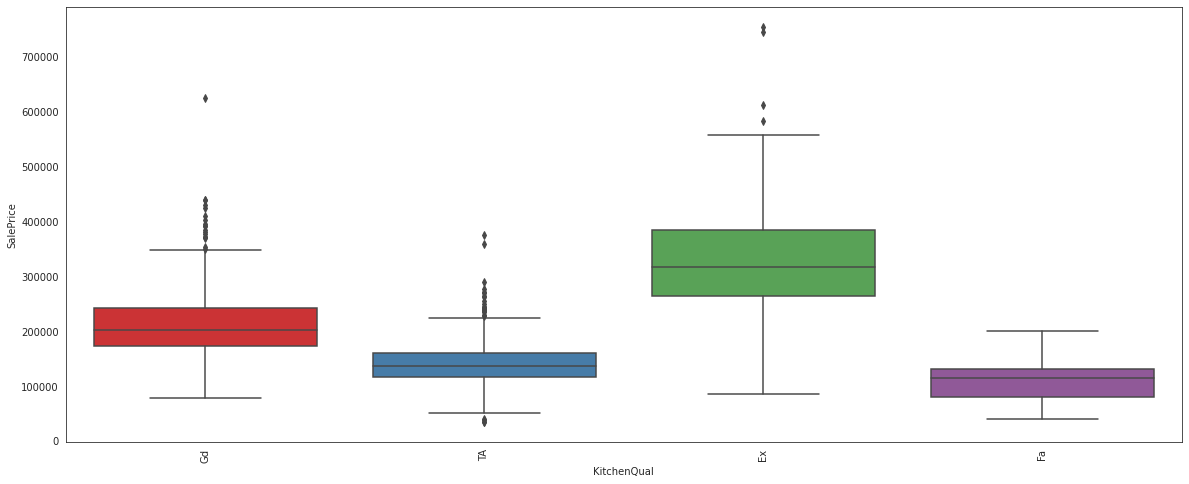

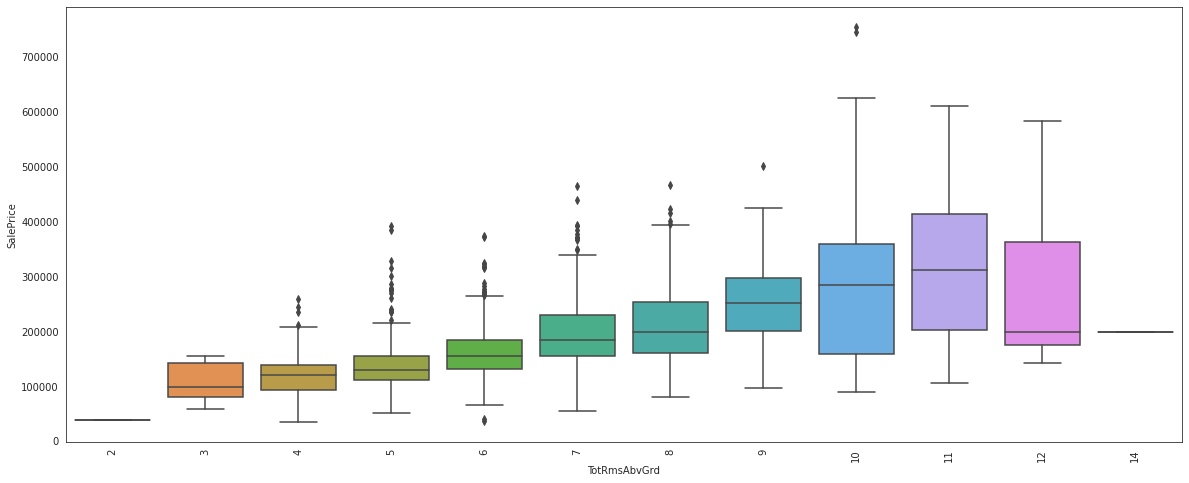

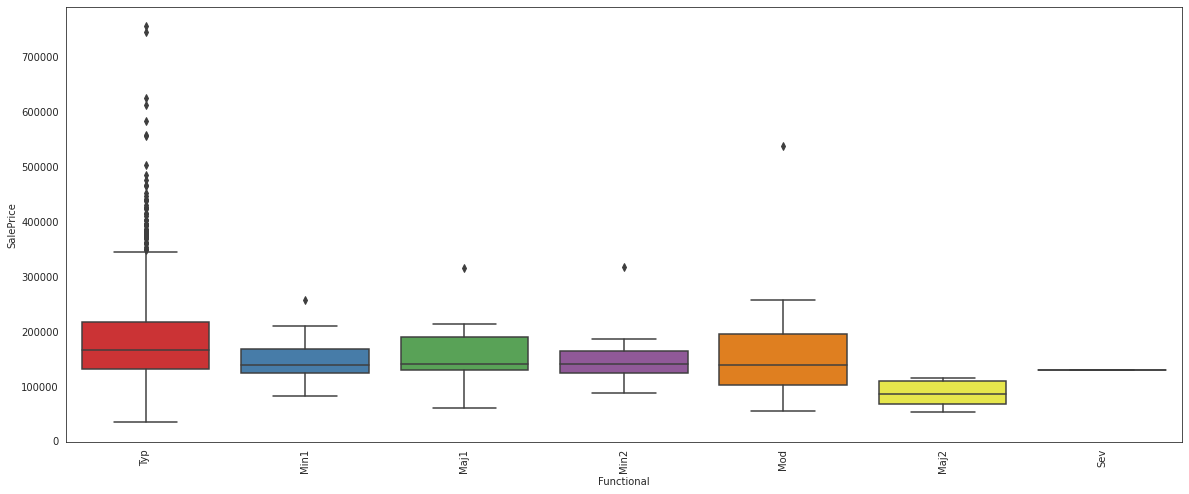

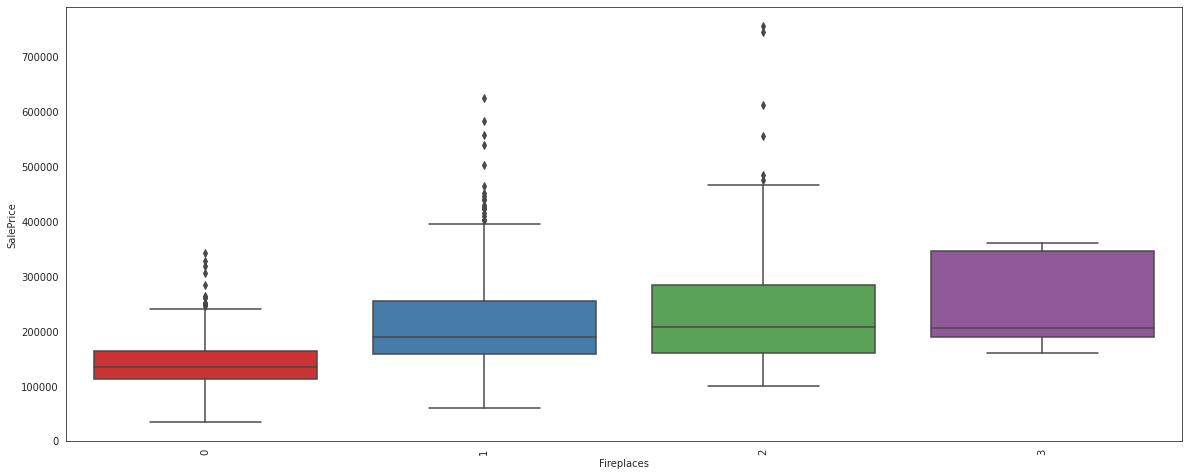

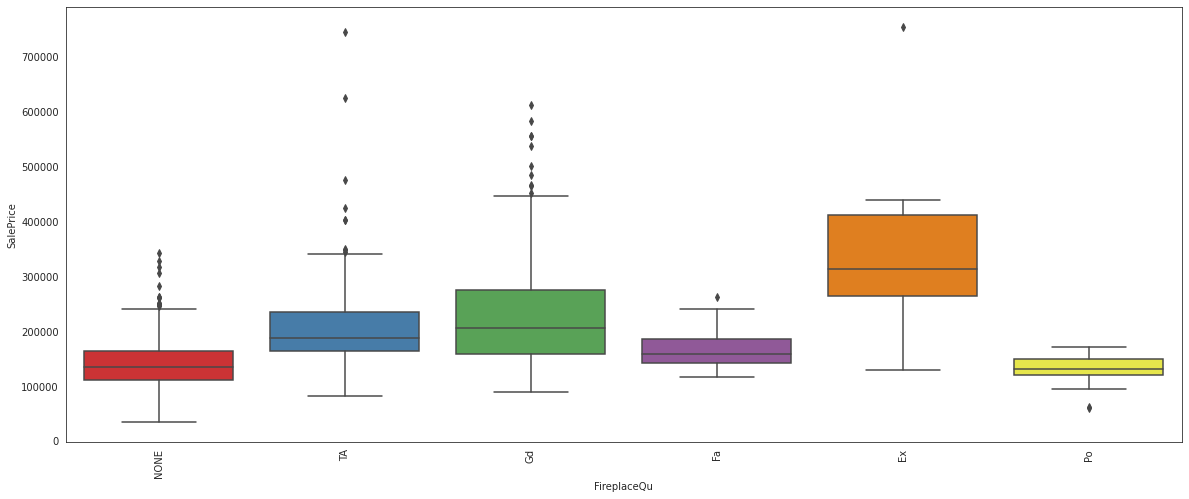

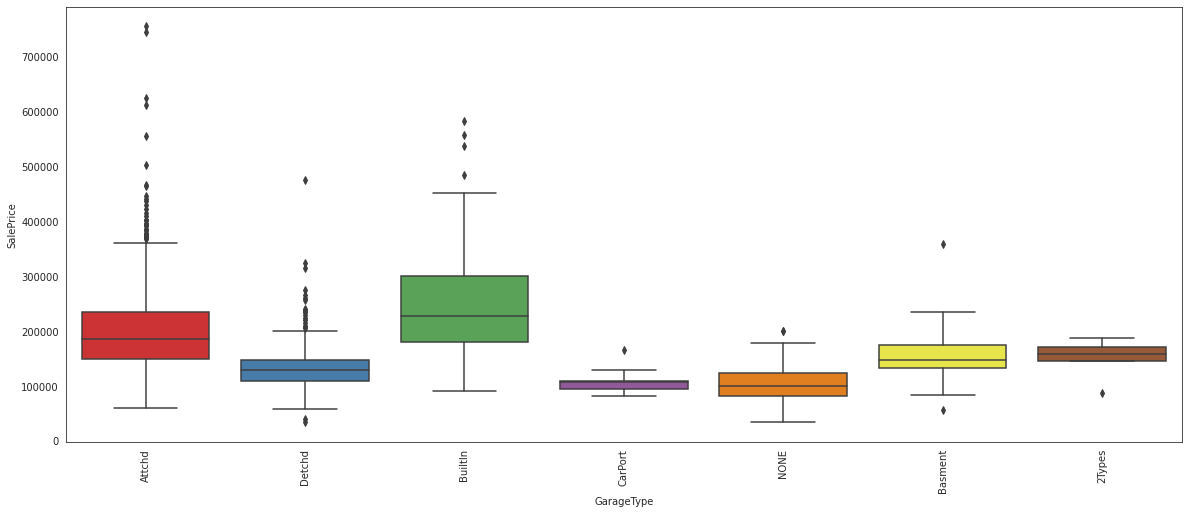

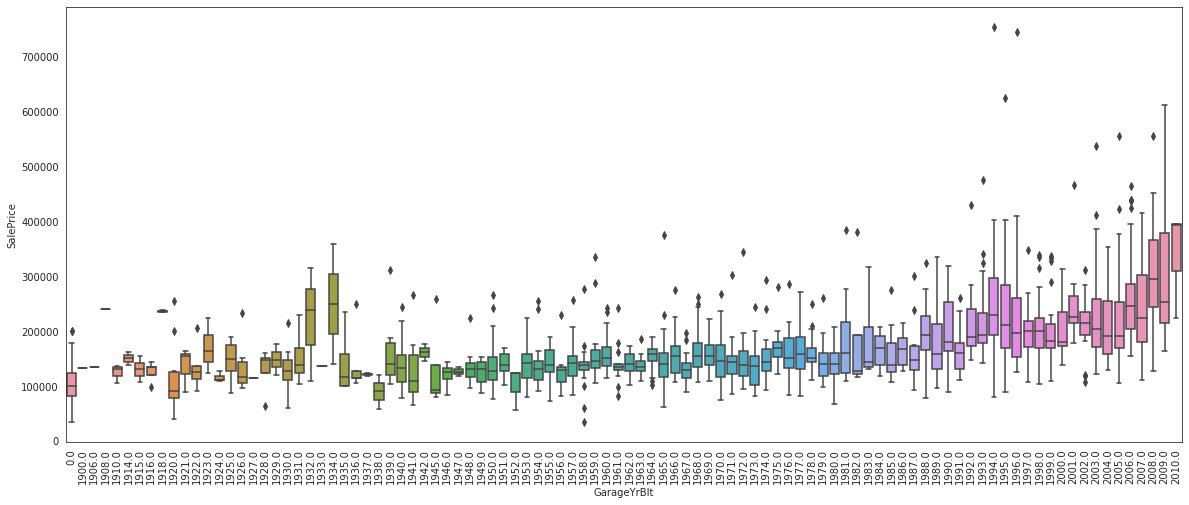

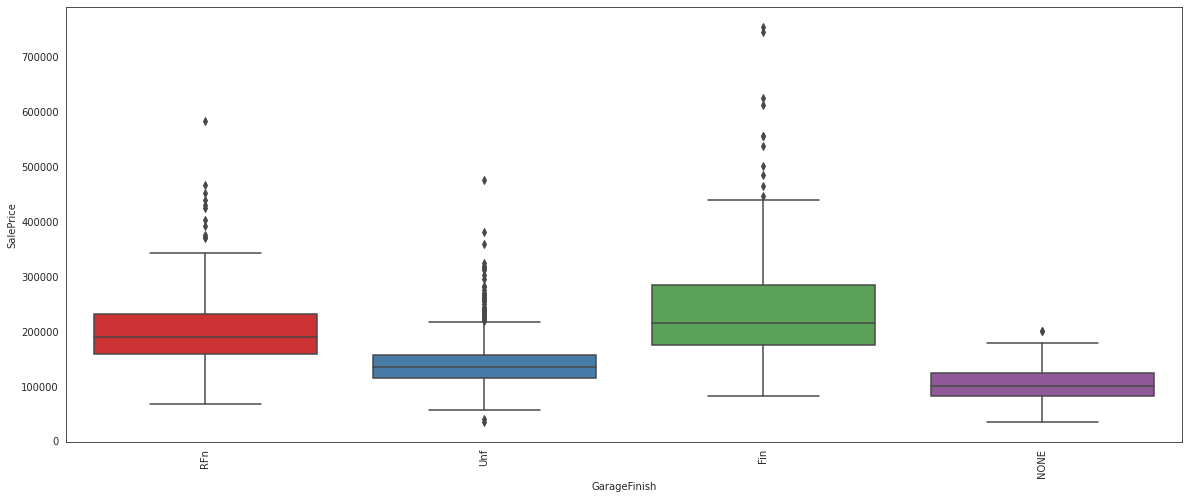

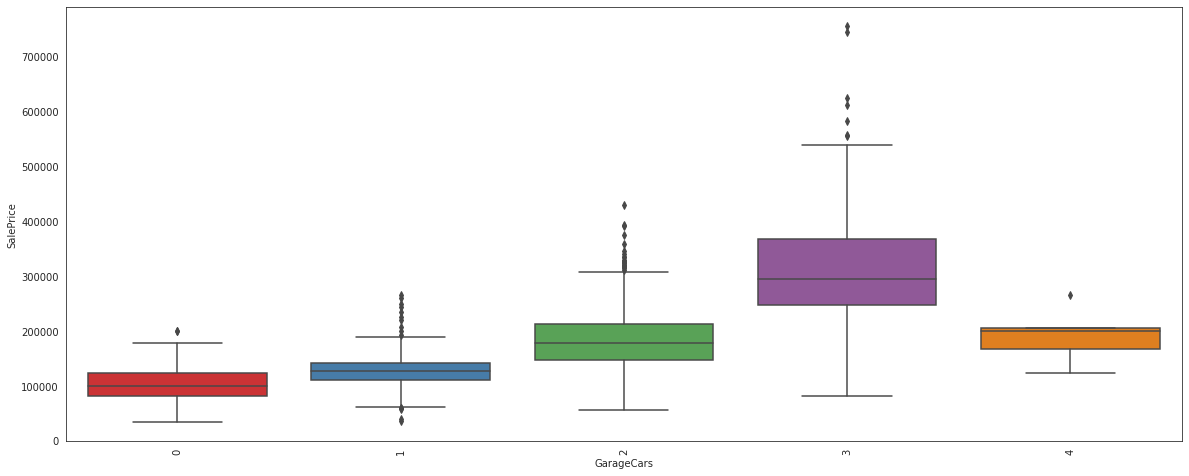

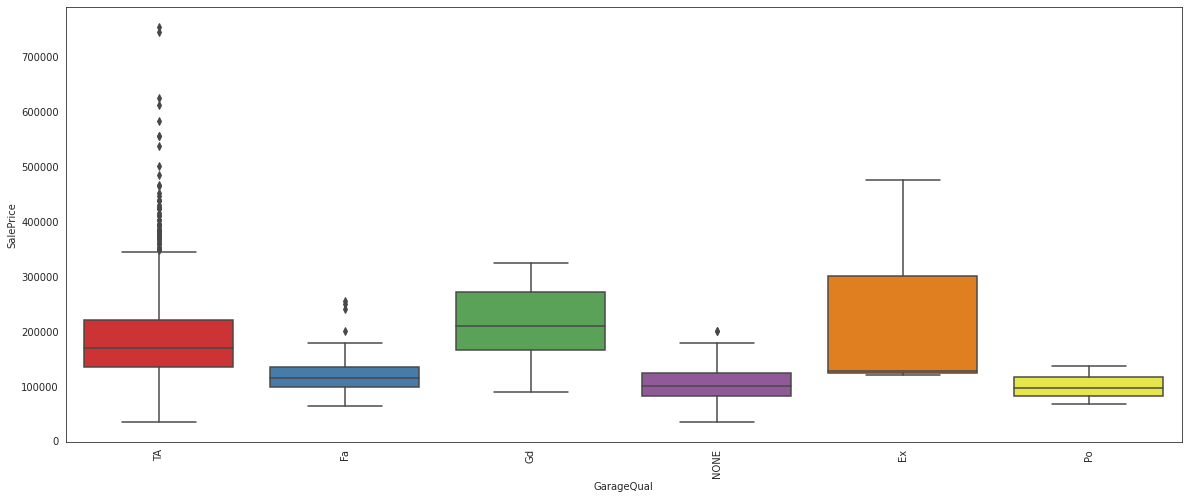

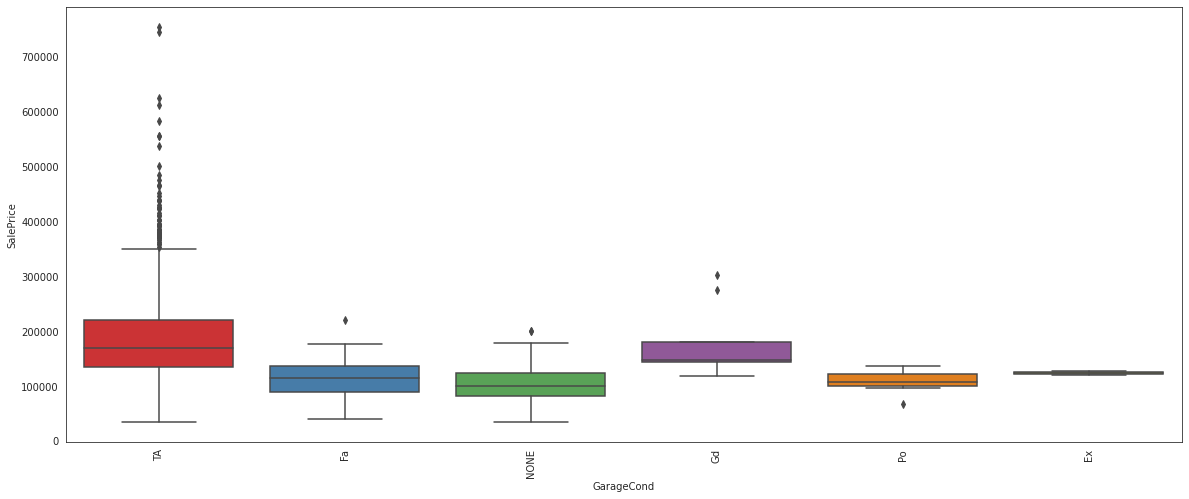

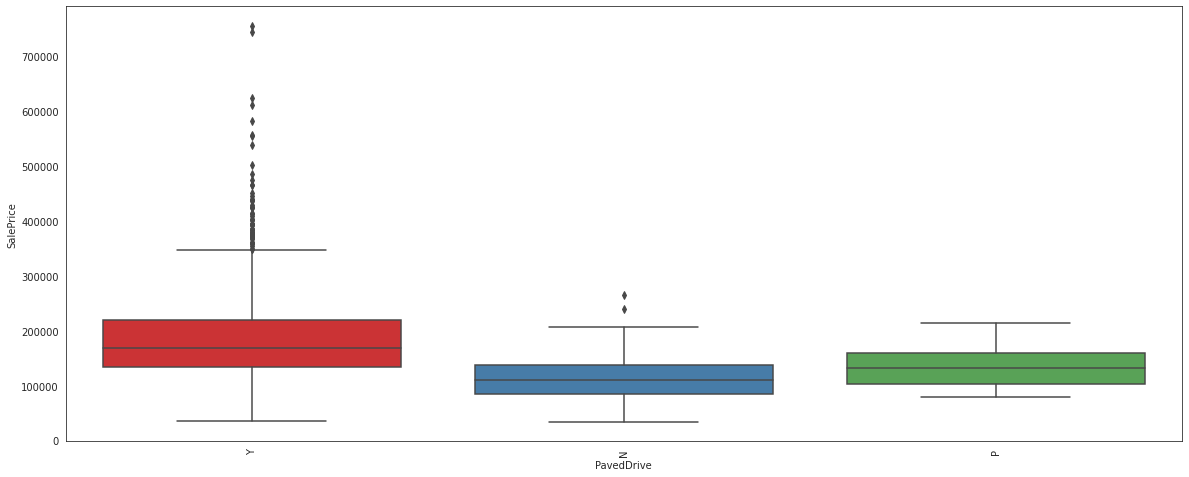

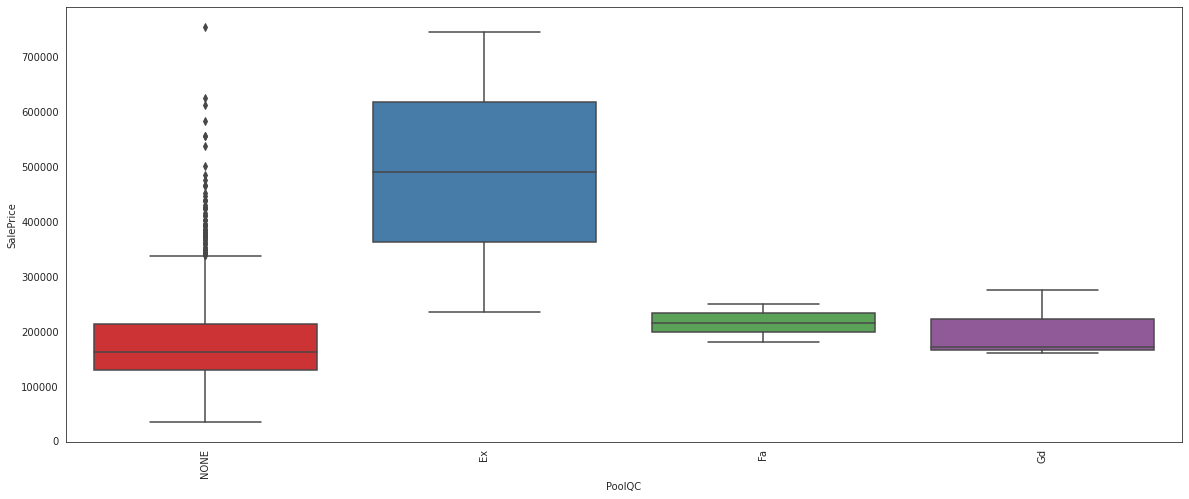

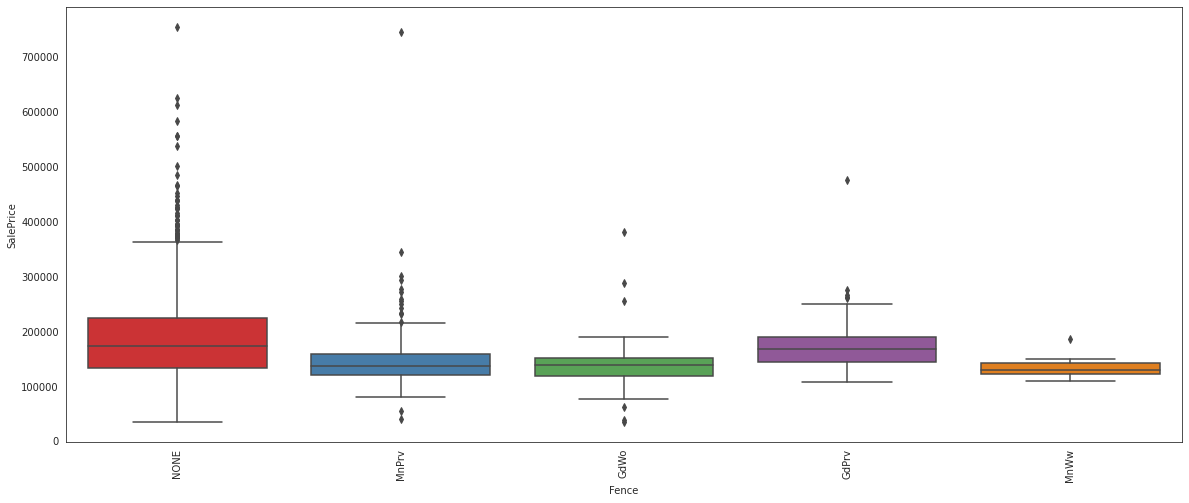

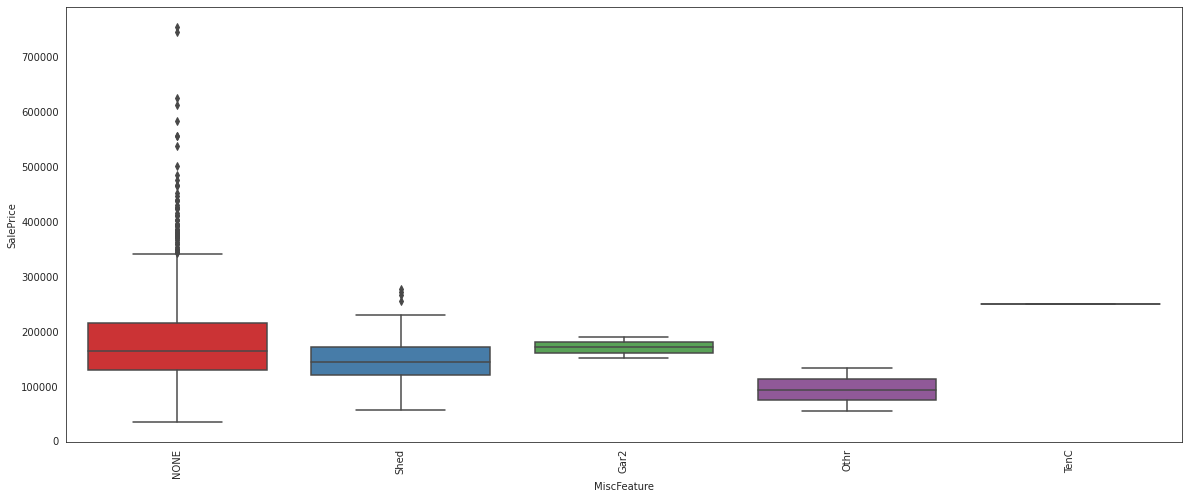

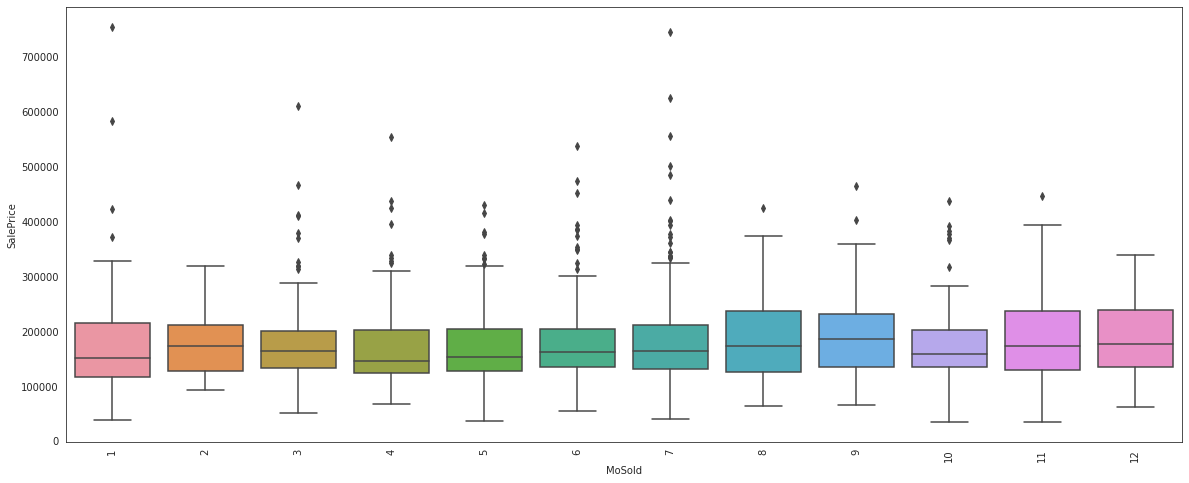

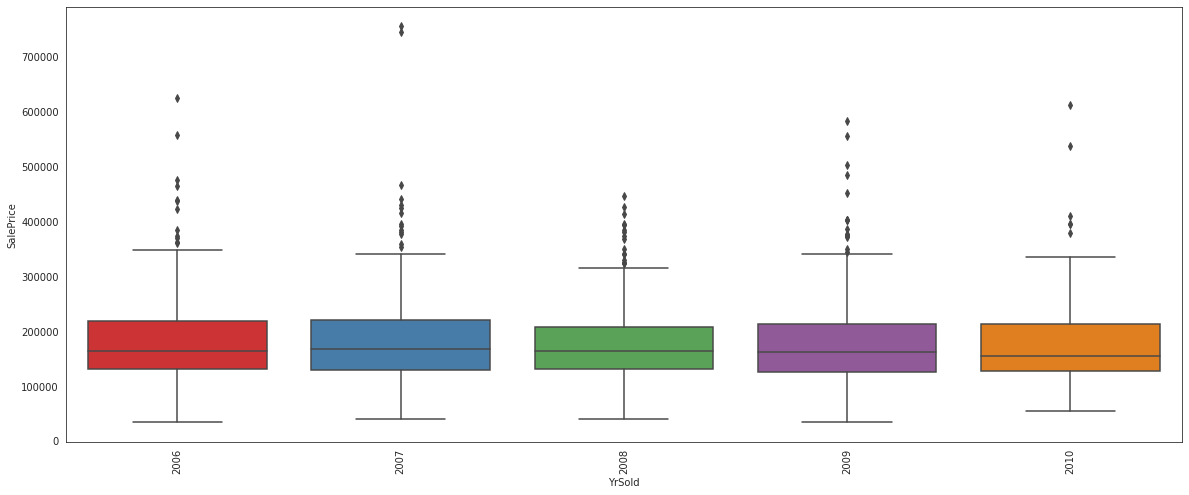

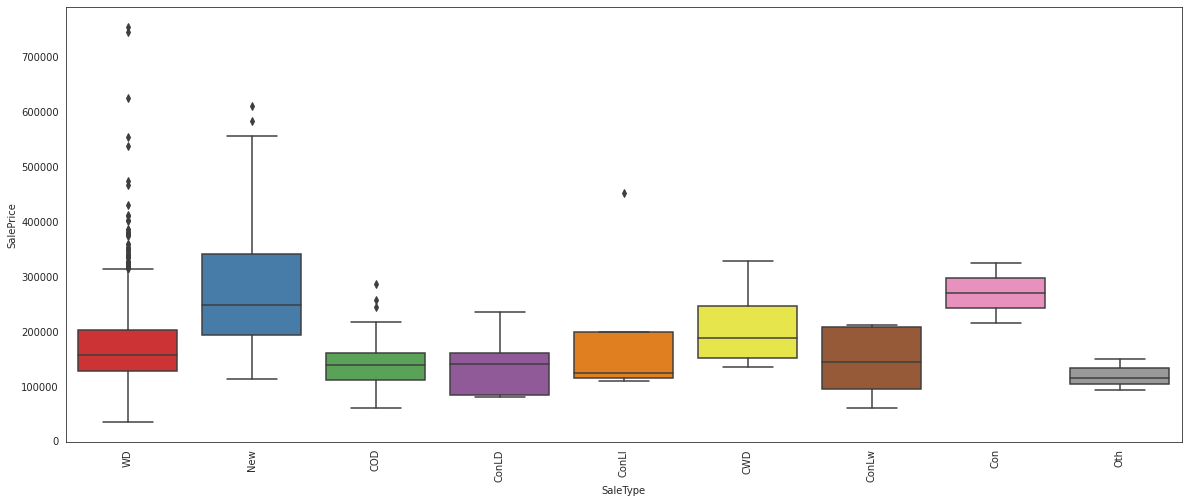

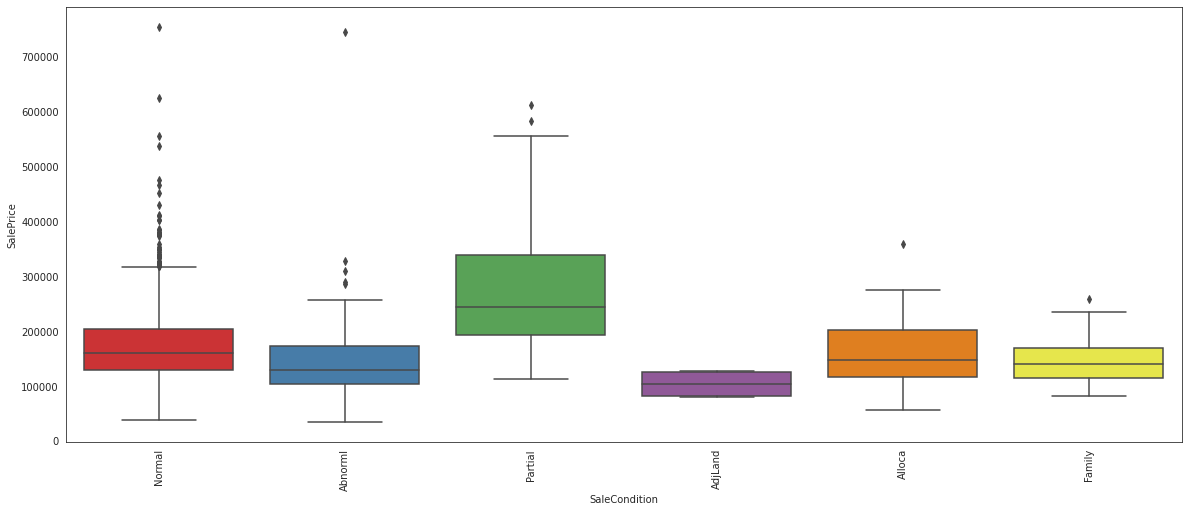

In [21]:
for num in num_cols:
    plot_num(train_df, num, 'SalePrice')

for cat in cat_cols:
    plot_cat(train_df, cat, 'SalePrice')

# Data Cleaning

## Converting to Ordinal and Categorical

In [22]:
train_df.drop('Id', axis=1, inplace=True)

In [23]:
def concat_dummies(df):
    for col in ['MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
            'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
            'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType', 'MiscFeature',
            'SaleType', 'SaleCondition', 'MoSold', 'MSSubClass', 'LandContour', 'Electrical']:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col, drop_first=True)], axis=1)
        df.drop(col, axis=1, inplace=True)
    
    return df

In [24]:
train_df_dummies = concat_dummies(train_df)
test_df_dummies = concat_dummies(test_df)

# In order to have same columns on both train and test sets, we do the following.
test_df_dummies = test_df_dummies.reindex(columns=train_df_dummies.columns, fill_value=0)
print(train_df.shape, test_df.shape, train_df_dummies.shape, test_df_dummies.shape)

(1460, 80) (1459, 80) (1460, 226) (1459, 226)


In [25]:
def ordinal_mapper(df):
    return df.replace({'LotShape': {'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4},
                     'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3},
                     'ExterQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                     'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                     'BsmtQual': {'NONE': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                     'BsmtCond': {'NONE': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                     'GarageQual': {'NONE': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                     'GarageCond': {'NONE': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                     'PoolQC': {'NONE': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
                     'FireplaceQu': {'NONE': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                     'HeatingQC': {'NONE': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                     'KitchenQual': {'NONE': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
                     'GarageFinish': {'NONE': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
                     'BsmtFinType1': {'NONE': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
                     'BsmtFinType2': {'NONE': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
                     'BsmtExposure': {'NONE': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
                     'Functional': {'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 3, 'Mod': 4, 'Min2': 5, 'Min1': 6, 'Typ': 7},
                     'PavedDrive': {'N': 0, 'P': 1, 'Y': 2},
                     'Fence': {'NONE': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4},
                     'Utilities': {'ELO': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3}})

In [26]:
train_df_dummies = ordinal_mapper(train_df_dummies)
test_df_dummies = ordinal_mapper(test_df_dummies)

In [27]:
# Cutting Date columns into decade indices

date_cols = ['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold']
period = 10
intervals = []

min_date = min(train_df_dummies.loc[train_df_dummies['GarageYrBlt'] > 0, date_cols].min().min(),
               train_df_dummies.loc[train_df_dummies['GarageYrBlt'] == 0, date_cols[1:]].min().min())
max_date = train_df_dummies[date_cols].max().max()

for i in range(int(min_date / 10) * 10, int(max_date / 10) * 10, period):
    intervals.append((i, i + period))

def cut_date(df):
    for col in date_cols:
        cut_list = pd.cut(df[col].to_list(), bins=pd.IntervalIndex.from_tuples(intervals))
        cut_list.categories = [i for i in range(1, len(intervals) + 1)]
        df[col] = pd.Series(cut_list).astype(float)
    
    return df

In [28]:
train_df_dummies = cut_date(train_df_dummies).fillna(0)
test_df_dummies = cut_date(test_df_dummies).fillna(0)

## Dropping Redundant Columns

In [29]:
# From the above heatmaps, we conclude that 'GarageArea', 'TotRmsAbvGrd', '1stFlrSF', and 'GarageYrBlt' are causing multicollinearity; so we'll drop them.

for df in [train_df_dummies, test_df_dummies]:
    df.drop(['GarageArea', 'TotRmsAbvGrd', '1stFlrSF', 'GarageYrBlt'], axis=1, inplace=True)

## Normalizing Columns

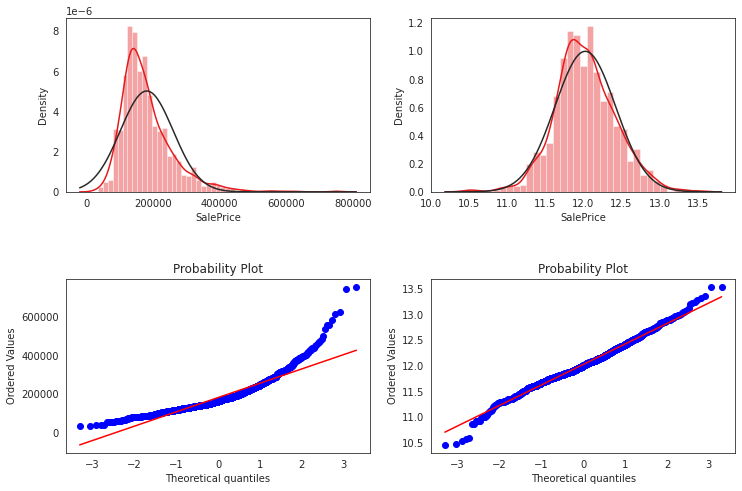

In [30]:
# Positive skewness --> do log transformation to normalize the distribution

fig, axis = plt.subplots(2, 2, figsize=(12,8))

sns.distplot(train_df_dummies['SalePrice'], kde=True, fit=stats.norm, ax=axis[0,0]);
stats.probplot(train_df_dummies['SalePrice'], plot=axis[1,0]);

sns.distplot(np.log(train_df_dummies['SalePrice']), kde=True, fit=stats.norm, ax=axis[0,1]);
stats.probplot(np.log(train_df_dummies['SalePrice']), plot=axis[1,1]);

fig.subplots_adjust(hspace=0.5)

train_df_dummies['SalePrice'] = np.log(train_df_dummies['SalePrice'])

# Do not forget to do the exp transform 'SalePrice' for prediction

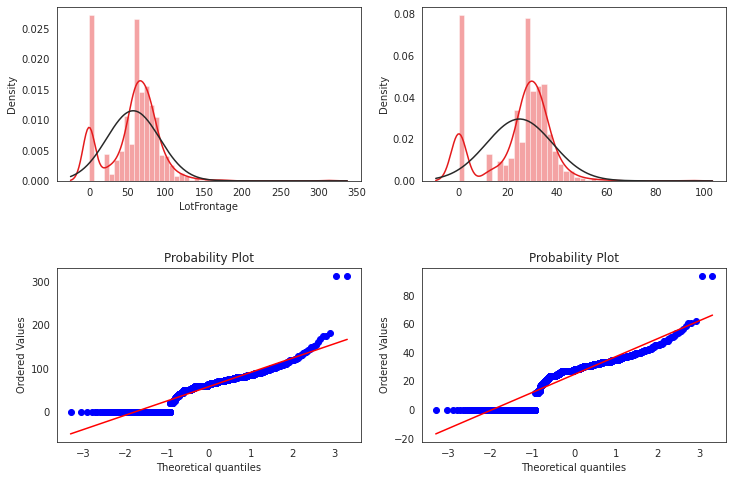

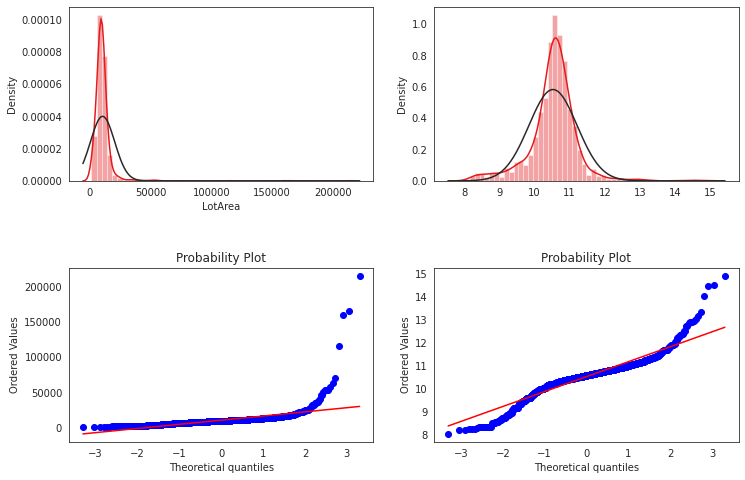

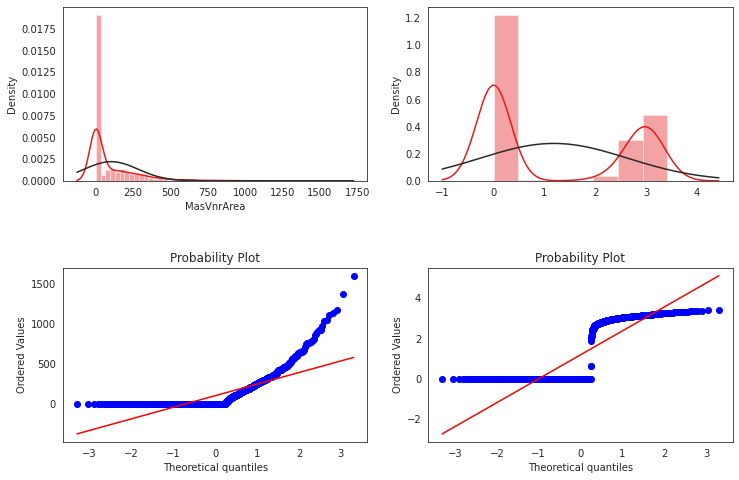

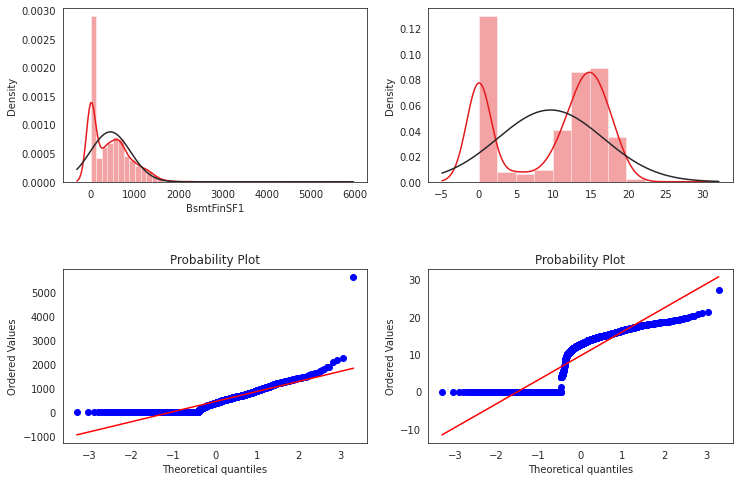

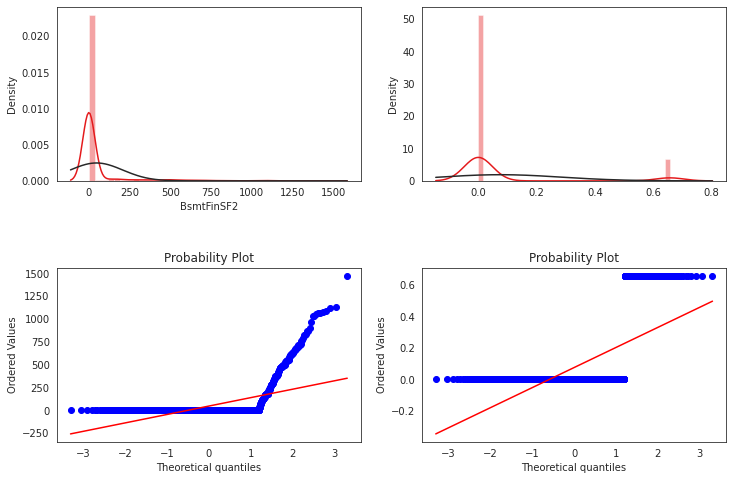

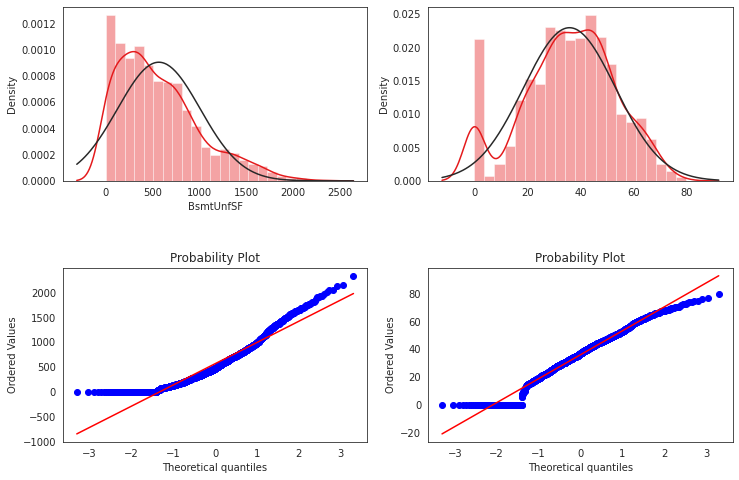

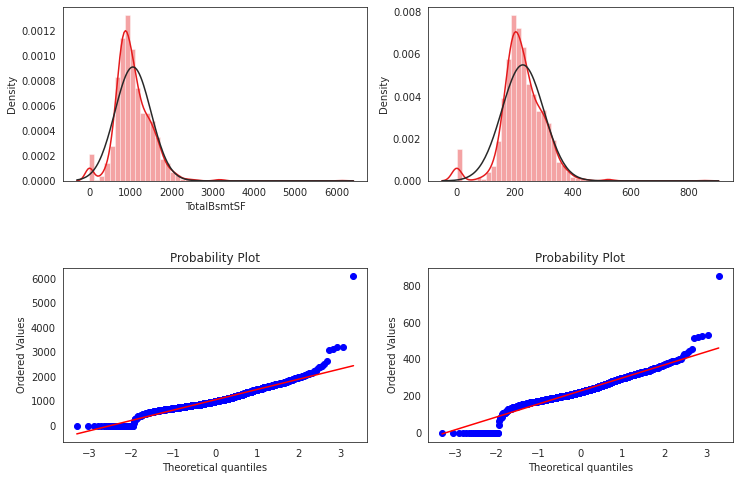

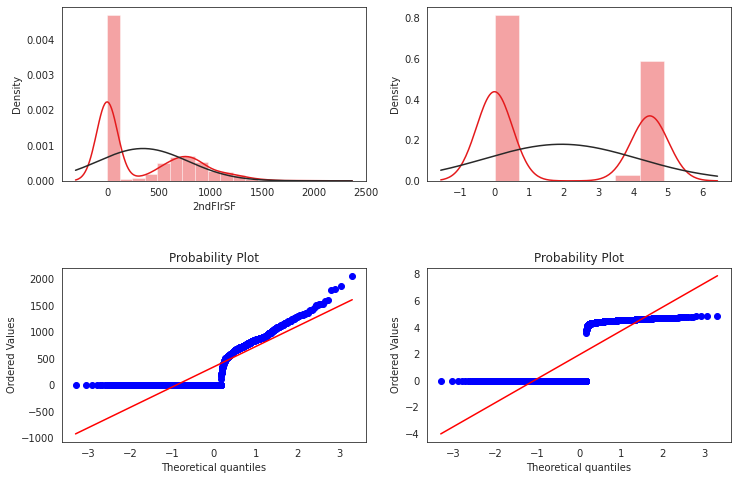

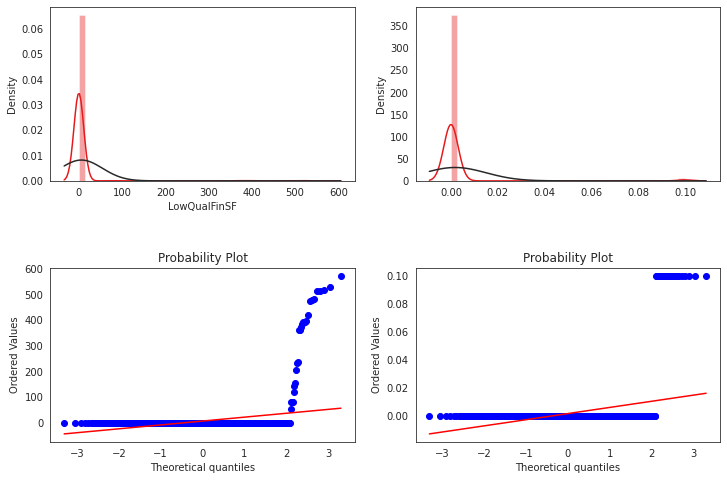

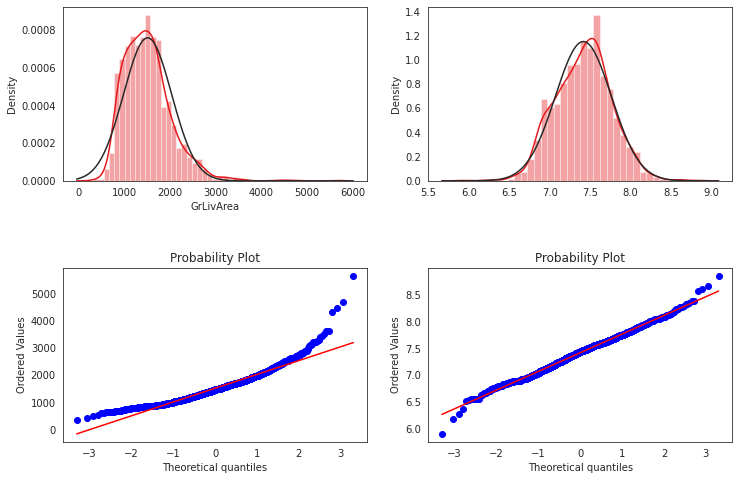

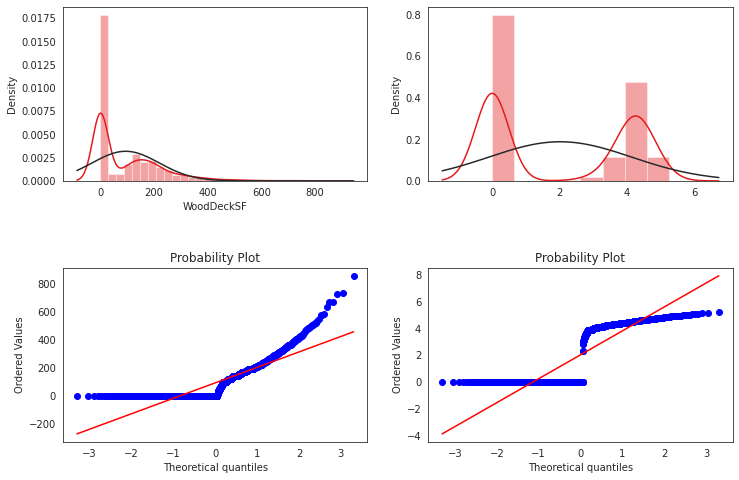

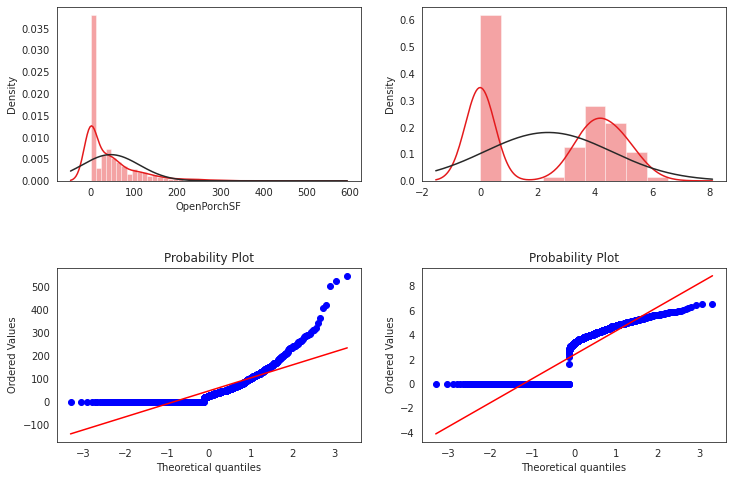

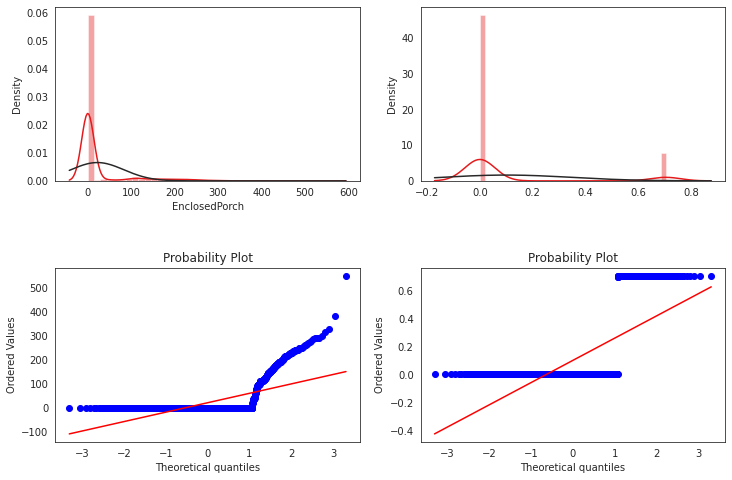

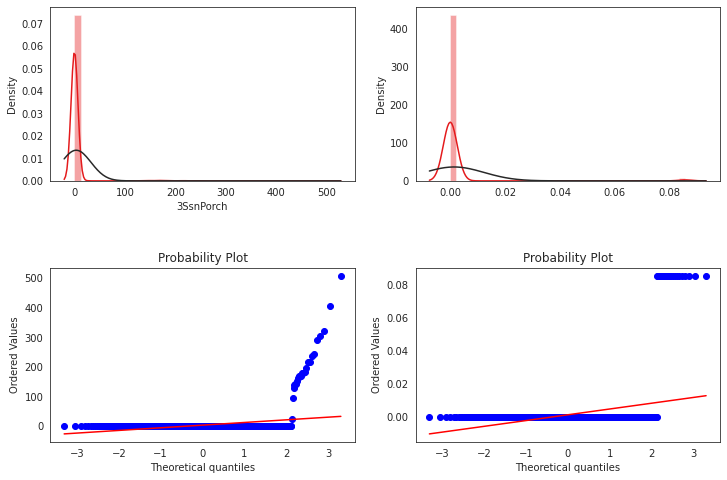

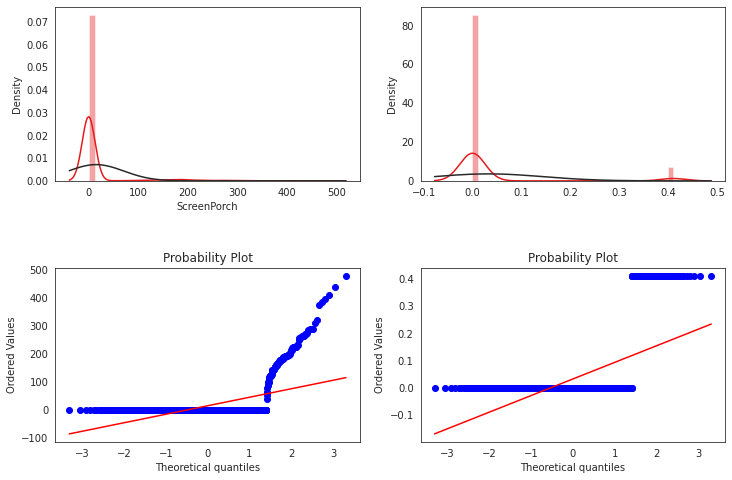

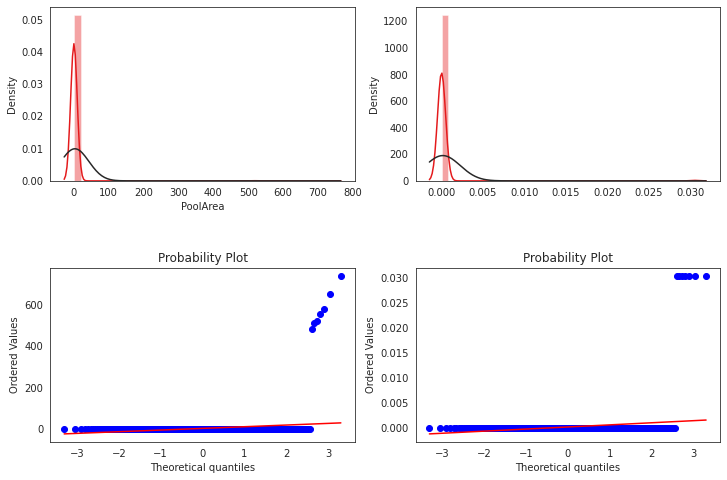

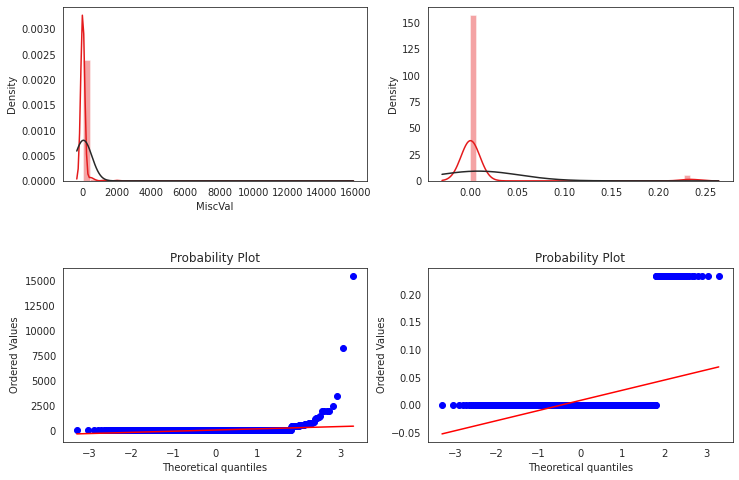

In [31]:
# We use 'yeojohnson' normalizer, due to the zero values in independent columns.
for num in num_cols:
    if num in train_df_dummies.columns:
        fig, axis = plt.subplots(2, 2, figsize=(12,8))

        sns.distplot(train_df_dummies[num], kde=True, fit=stats.norm, ax=axis[0,0]);
        stats.probplot(train_df_dummies[num], plot=axis[1,0]);

        sns.distplot(stats.yeojohnson(train_df_dummies[num])[0], kde=True, fit=stats.norm, ax=axis[0,1]);
        stats.probplot(stats.yeojohnson(train_df_dummies[num])[0], plot=axis[1,1]);

        fig.subplots_adjust(hspace=0.5)
    else:
        continue

In [32]:
# Let's only normalize 'LotArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea'.

for col in ['LotArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea']:
    train_df_dummies[col], _ = stats.yeojohnson(train_df_dummies[col])